In [1]:
import csv
import os
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import seaborn as sns
import glob
import numpy as np
import random
import math
from math import sqrt
import hashlib
import numpy as np
import matplotlib.animation as animation
import itertools
from sklearn.cluster import KMeans
from matplotlib.animation import FuncAnimation, PillowWriter
import matplotlib.patches as patches
import transformations as t
from sklearn.preprocessing import MinMaxScaler
from scipy.spatial.transform import Rotation
from IPython import display
import warnings
import scipy.stats
from heapq import merge
warnings.simplefilter(action='ignore', category=FutureWarning)

/home/severinlemaignan/projects/Nicola/game/studyanalysis/transformations.py:1924: UserWarning: No module named '_transformations'
  warnings.warn(str(exc))


## Create DF for VICON data

In [2]:
# csv_files = Path("/home/nicola/gameapp/data/studyanalysis/").glob("study4H.csv")
# data_df = pd.concat([pd.read_csv(fp) for fp in file])

file = Path("study4H.csv")
data_df = pd.read_csv(file)


# csv_files = Path("C:/Users/niick/studyanalysis/").glob("*H.csv")
# data_df = pd.concat([pd.read_csv(fp).assign(GROUP=fp.name.split("H")[0]) for fp in csv_files])
# data_df['GROUP']

In [3]:
# data_df['1RZ'] = np.radians(data_df['1RZ'])-np.pi/2
# data_df['2RZ'] = np.radians(data_df['2RZ'])-np.pi/2
# data_df['3RZ'] = np.radians(data_df['3RZ'])-np.pi/2
# data_df['4RZ'] = np.radians(data_df['4RZ'])-np.pi/2
# data_df['5RZ'] = np.radians(data_df['5RZ'])-np.pi/2

data_df['1RZ'] = data_df['1RZ'] - 90
data_df['2RZ'] = data_df['2RZ'] - 90
data_df['3RZ'] = data_df['3RZ'] + 90
data_df['4RZ'] = data_df['4RZ'] - 90
data_df['5RZ'] = data_df['5RZ'] - 90

In [4]:
data_df

,Frame,Sub Frame,1RX,1RY,1RZ,1TX,1TY,1TZ,2RX,2RY,...,4RZ,4TX,4TY,4TZ,5RX,5RY,5RZ,5TX,5TY,5TZ
0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,0.242470,0.595064,...,-87.079727,499.551178,1463.979126,1705.404053,-0.983125,0.317678,-87.882024,-603.677307,1144.998047,1714.858765
1,2,0,NaN,NaN,NaN,NaN,NaN,NaN,0.242732,0.595494,...,-87.078917,499.478363,1463.854736,1705.187622,-0.987755,0.303619,-87.885589,-600.565857,1147.517334,1715.559204
2,3,0,NaN,NaN,NaN,NaN,NaN,NaN,0.243126,0.596679,...,-87.079011,499.354248,1463.750366,1704.964722,-0.990419,0.300450,-87.888282,-597.469727,1149.912964,1715.596924
3,4,0,2.108255,-0.821499,-91.731169,-1145.964966,104.512016,1804.629028,0.245585,0.595089,...,NaN,NaN,NaN,NaN,0.244199,0.441406,-88.562994,547.625061,1403.888184,1682.805908
4,5,0,2.106910,-0.825568,-91.740512,-1145.450073,104.422180,1804.675537,0.249002,0.591377,...,NaN,NaN,NaN,NaN,0.250417,0.444452,-88.566298,547.547913,1403.860596,1682.503784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73044,73045,0,0.783705,-0.923710,-88.321353,2737.856689,-92.636826,1391.678711,-0.279485,0.262759,...,-88.887319,2595.254395,-52.266518,1399.950562,-0.003447,-0.139369,-88.905724,2604.039062,-496.901367,1388.745972
73045,73046,0,0.783378,-0.923567,-88.321022,2737.837646,-92.604836,1391.678833,-0.279495,0.262758,...,-88.887457,2595.239014,-52.245773,1399.946533,-0.003530,-0.139356,-88.905829,2604.049805,-496.914673,1388.744019
73046,73047,0,0.783337,-0.923615,-88.320869,2737.834961,-92.622406,1391.685181,-0.279413,0.262777,...,-88.887513,2595.257568,-52.255215,1399.969727,-0.003579,-0.139271,-88.905794,2604.036621,-496.903290,1388.736572
73047,73048,0,0.783112,-0.923422,-88.320981,2737.856934,-92.623322,1391.687012,-0.279456,0.262781,...,-88.887341,2595.253174,-52.249115,1399.949829,-0.003328,-0.139463,-88.905903,2604.043701,-496.902039,1388.744873


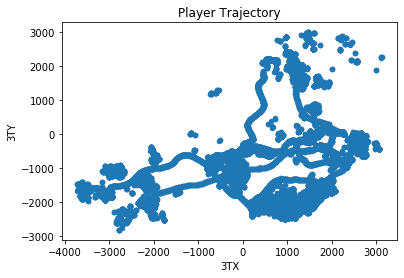

In [5]:
data_df.plot.scatter("3TX", "3TY", title = "Player Trajectory")

##### Distance - plot distance from person to person

In [6]:
df_dist= pd.DataFrame()  


OneTX, OneTY, OneTZ = data_df["1TX"], data_df["1TY"], data_df["1TZ"]
TwoTX, TwoTY, TwoTZ = data_df["2TX"], data_df["2TY"], data_df["2TZ"]
ThreeTX, ThreeTY, ThreeTZ = data_df["3TX"], data_df["3TY"], data_df["3TZ"]
FourTX, FourTY, FourTZ = data_df["4TX"], data_df["4TY"], data_df["4TZ"]
FiveTX, FiveTY, FiveTZ = data_df["5TX"], data_df["5TY"], data_df["5TZ"]

# df_dist["Frame"] = data_df['Frame']
df_dist["distance_1_2"] = np.power(np.power(OneTX-TwoTX,2) + np.power(OneTY-TwoTY,2), 0.5)
df_dist["distance_1_3"] = np.power(np.power(OneTX-ThreeTX,2) + np.power(OneTY-ThreeTY,2), 0.5)
df_dist["distance_1_4"] = np.power(np.power(OneTX-FourTX,2) + np.power(OneTY-FourTY,2), 0.5)
df_dist["distance_1_5"] = np.power(np.power(OneTX-FiveTX,2) + np.power(OneTY-FiveTY,2), 0.5)

df_dist["distance_2_1"] = np.power(np.power(TwoTX-OneTX,2) + np.power(TwoTY-OneTY,2), 0.5)
df_dist["distance_2_3"] = np.power(np.power(TwoTX-ThreeTX,2) + np.power(TwoTY-ThreeTY,2), 0.5)
df_dist["distance_2_4"] = np.power(np.power(TwoTX-FourTX,2) + np.power(TwoTY-FourTY,2), 0.5)
df_dist["distance_2_5"] = np.power(np.power(TwoTX-FiveTX,2) + np.power(TwoTY-FiveTY,2), 0.5)

df_dist["distance_3_1"] = np.power(np.power(ThreeTX-OneTX,2) + np.power(ThreeTY-OneTY,2), 0.5)
df_dist["distance_3_2"] = np.power(np.power(ThreeTX-TwoTX,2) + np.power(ThreeTY-TwoTY,2), 0.5)
df_dist["distance_3_4"] = np.power(np.power(ThreeTX-FourTX,2) + np.power(ThreeTY-FourTY,2), 0.5)
df_dist["distance_3_5"] = np.power(np.power(ThreeTX-FiveTX,2) + np.power(ThreeTY-FiveTY,2), 0.5)

df_dist["distance_4_1"] = np.power(np.power(FourTX-OneTX,2) + np.power(FourTY-OneTY,2), 0.5)
df_dist["distance_4_2"] = np.power(np.power(FourTX-TwoTX,2) + np.power(FourTY-TwoTY,2), 0.5)
df_dist["distance_4_3"] = np.power(np.power(FourTX-ThreeTX,2) + np.power(FourTY-ThreeTY,2), 0.5)
df_dist["distance_4_5"] = np.power(np.power(FourTX-FiveTX,2) + np.power(FourTY-FiveTY,2), 0.5)

df_dist["distance_5_1"] = np.power(np.power(FiveTX-OneTX,2) + np.power(FiveTY-OneTY,2), 0.5)
df_dist["distance_5_2"] = np.power(np.power(FiveTX-TwoTX,2) + np.power(FiveTY-TwoTY,2), 0.5)
df_dist["distance_5_3"] = np.power(np.power(FiveTX-ThreeTX,2) + np.power(FiveTY-ThreeTY,2), 0.5)
df_dist["distance_5_4"] = np.power(np.power(FiveTX-FourTX,2) + np.power(FiveTY-FourTY,2), 0.5)

# df_dist=(df_dist-df_dist.mean())/df_dist.std()
df_dist=(df_dist-df_dist.min())/(df_dist.max()-df_dist.min())
df_dist['Frame'] = df_dist.index
df_dist

,distance_1_2,distance_1_3,distance_1_4,distance_1_5,distance_2_1,distance_2_3,distance_2_4,distance_2_5,distance_3_1,distance_3_2,...,distance_3_5,distance_4_1,distance_4_2,distance_4_3,distance_4_5,distance_5_1,distance_5_2,distance_5_3,distance_5_4,Frame
0,NaN,NaN,NaN,NaN,NaN,0.041776,0.557774,0.370820,NaN,0.041776,...,0.333654,NaN,0.557774,0.457547,0.211950,NaN,0.370820,0.333654,0.211950,0
1,NaN,NaN,NaN,NaN,NaN,0.041768,0.557735,0.371180,NaN,0.041768,...,0.334063,NaN,0.557735,0.457517,0.211249,NaN,0.371180,0.334063,0.211249,1
2,NaN,NaN,NaN,NaN,NaN,0.041752,0.557686,0.371508,NaN,0.041752,...,0.334474,NaN,0.557686,0.457519,0.210549,NaN,0.371508,0.334474,0.210549,2
3,0.200402,0.163363,NaN,0.677944,0.200402,0.041785,NaN,0.471318,0.163363,0.041785,...,0.449598,NaN,NaN,NaN,NaN,0.677944,0.471318,0.449598,NaN,3
4,0.200202,0.163099,NaN,0.677806,0.200202,0.041834,NaN,0.471370,0.163099,0.041834,...,0.449574,NaN,NaN,NaN,NaN,0.677806,0.471370,0.449574,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73044,0.044013,0.024002,0.025621,0.132383,0.044013,0.040087,0.042825,0.043036,0.024002,0.040087,...,0.059222,0.025621,0.042825,0.044508,0.081749,0.132383,0.043036,0.059222,0.081749,73044
73045,0.044014,0.024006,0.025620,0.132394,0.044014,0.040083,0.042828,0.043039,0.024006,0.040083,...,0.059222,0.025620,0.042828,0.044508,0.081756,0.132394,0.043039,0.059222,0.081756,73045
73046,0.044010,0.024009,0.025617,0.132386,0.044010,0.040085,0.042822,0.043042,0.024009,0.040085,...,0.059217,0.025617,0.042822,0.044509,0.081752,0.132386,0.043042,0.059217,0.081752,73046
73047,0.044014,0.024002,0.025622,0.132387,0.044014,0.040087,0.042828,0.043037,0.024002,0.040087,...,0.059224,0.025622,0.042828,0.044508,0.081753,0.132387,0.043037,0.059224,0.081753,73047


### Plot location

KeyError: 'GROUP'

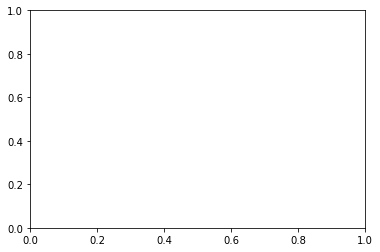

In [7]:
fig, ax = plt.subplots()

grouped = data_df.groupby('GROUP')

plt.xlim(-4500, 4500)
plt.ylim(-4500, 4500)

start = 10000
end = 100000

for name, group in grouped:
    x = group.iloc[start:end]['1TX']
    y = group.iloc[start:end]['1TY']
    plt.scatter(x, y, s=0.5)
    
    x = group.iloc[start:end]['2TX']
    y = group.iloc[start:end]['2TY']
    plt.scatter(x, y, s=0.5)
    
    
    x = group.iloc[start:end]['3TX']
    y = group.iloc[start:end]['3TY']
    plt.scatter(x, y, s=1)
    
    
    x = group.iloc[start:end]['4TX']
    y = group.iloc[start:end]['4TY']
    plt.scatter(x, y, s=0.5)
    
    
    x = group.iloc[start:end]['5TX']
    y = group.iloc[start:end]['5TY']
    plt.scatter(x, y, s=0.5)
    print(x)
    
    
    # Display the image
    # Create a Rectangle patch
    rect1 = patches.Rectangle((-3700, -2700), 2500, 2000, linewidth=2, edgecolor='gold', facecolor='none')
    rect2 = patches.Rectangle((600, 1350), 2500, 2000, linewidth=2, edgecolor='gold', facecolor='none')
    rect3 = patches.Rectangle((800, -1100), 2000, 2000, linewidth=2, edgecolor='gold', facecolor='none')
    rect4 = patches.Rectangle((0, -2800), 2000, 1500, linewidth=2, edgecolor='gold', facecolor='none')
    
    
    # Add the patch to the
    ax.add_patch(rect1)
    ax.add_patch(rect2)
    ax.add_patch(rect3)
    ax.add_patch(rect4)
    
    width = 14
    height = 14
    fig.set_size_inches(width, height)
    
    plt.show()


### Plot with gaze direction

32000


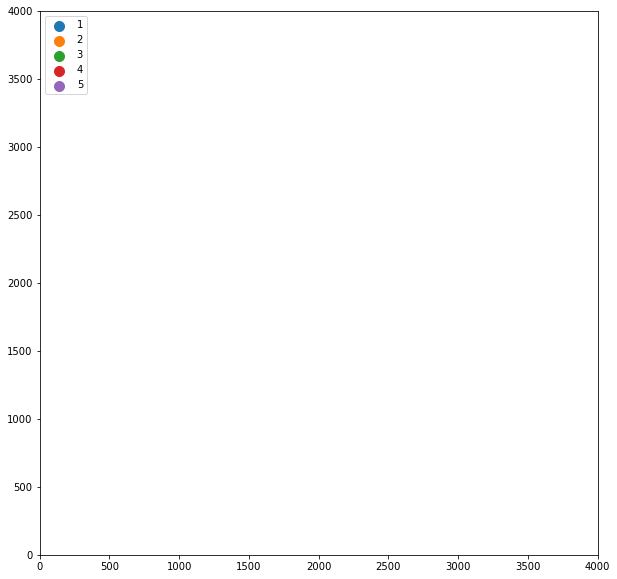

32050


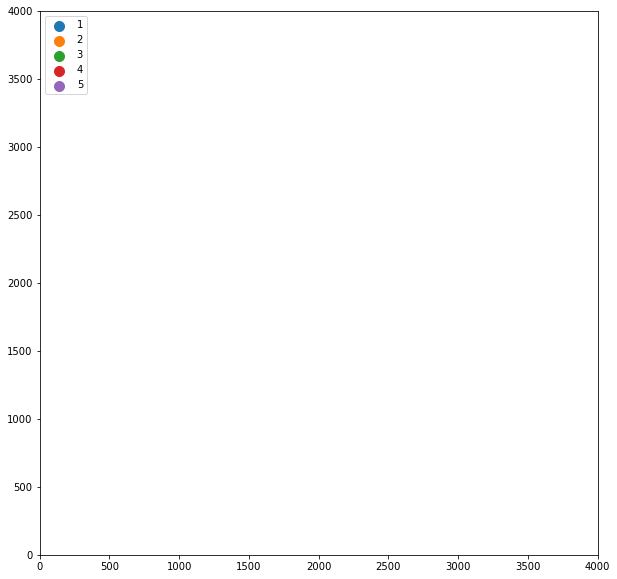

32100


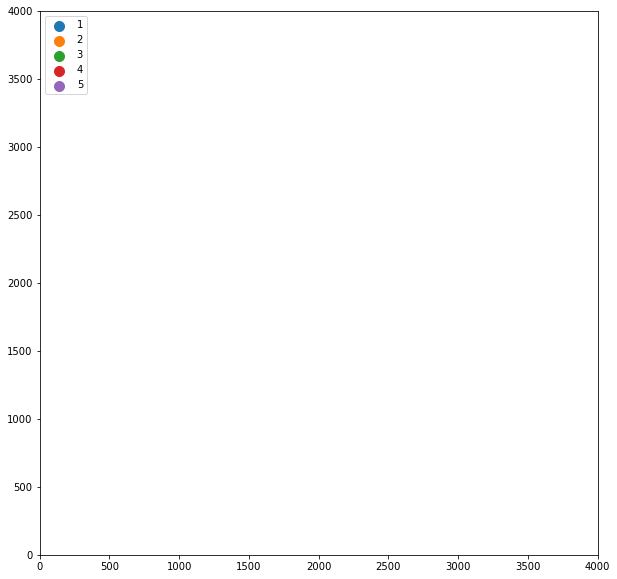

32150


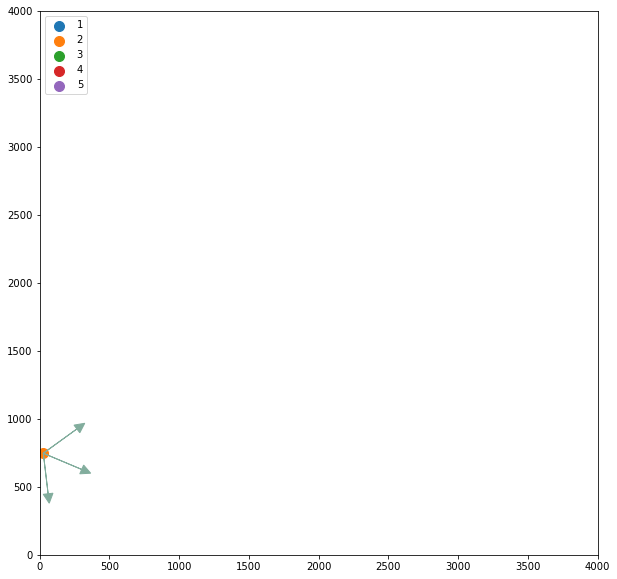

32200


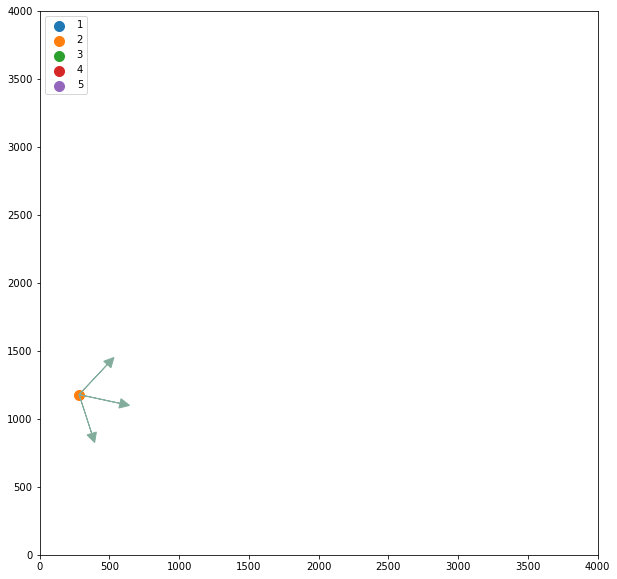

32250


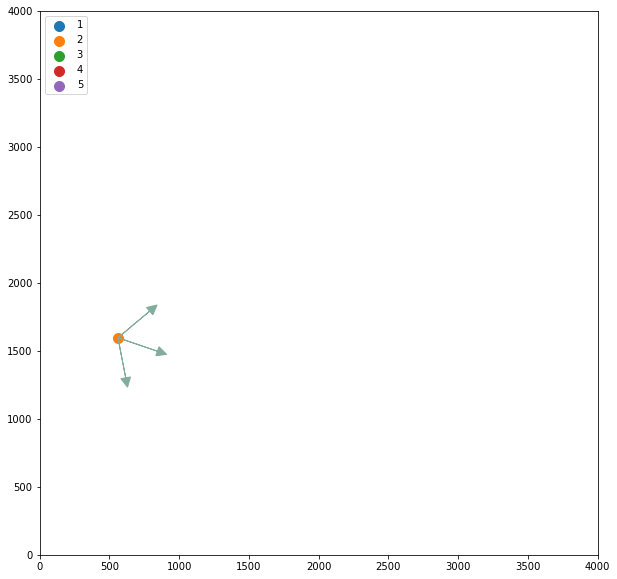

32300


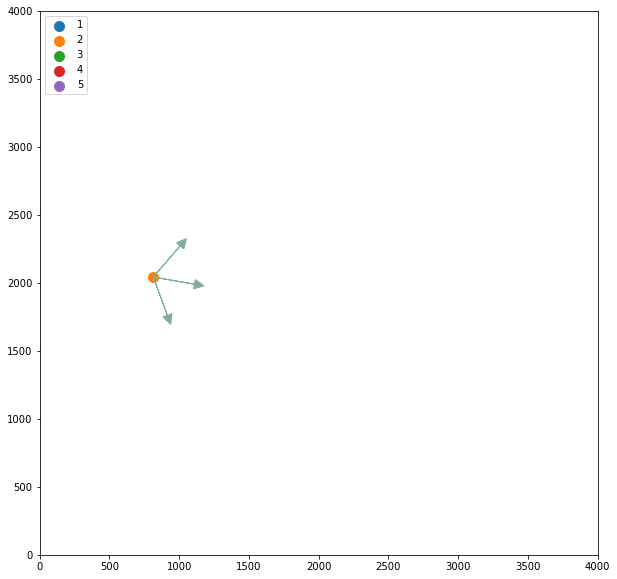

32350


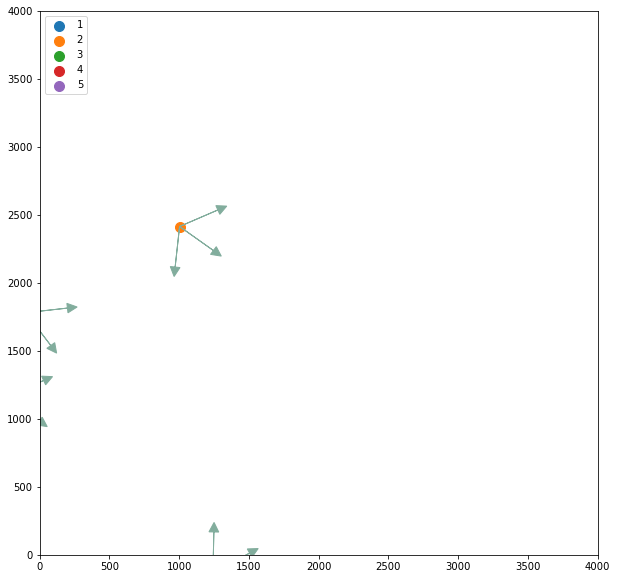

32400


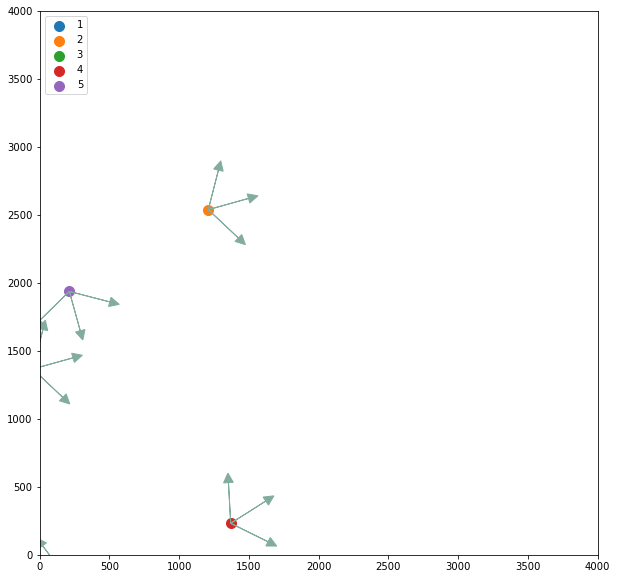

32450


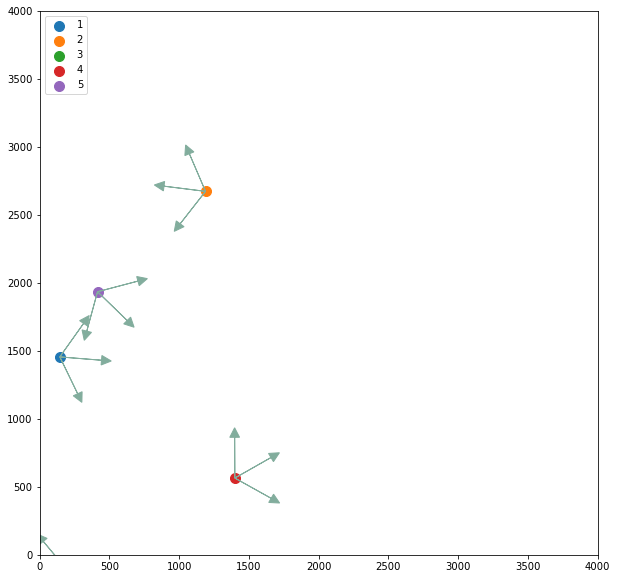

32500


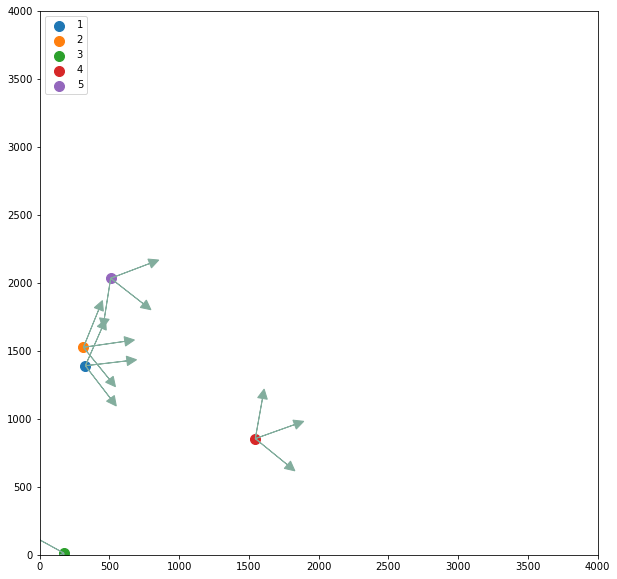

32550


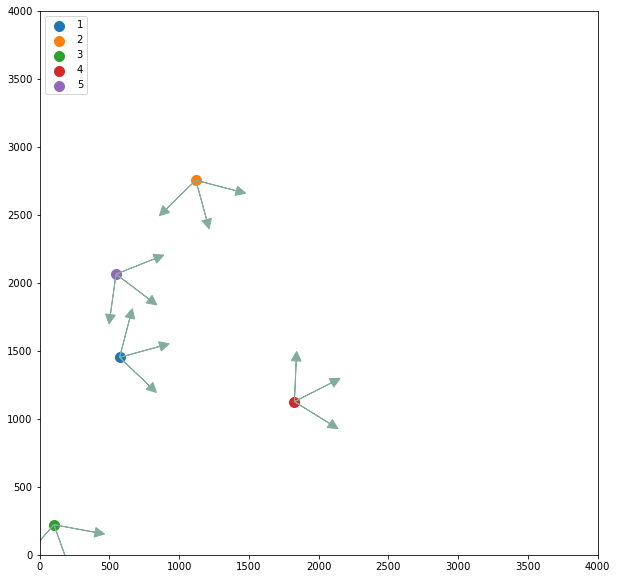

32600


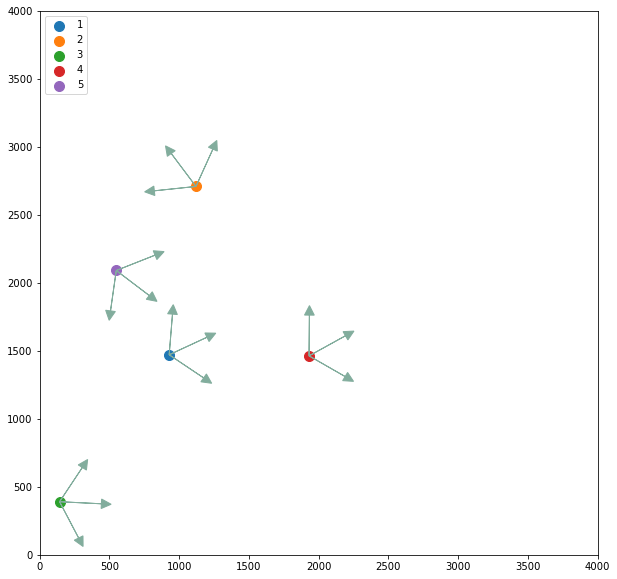

32650


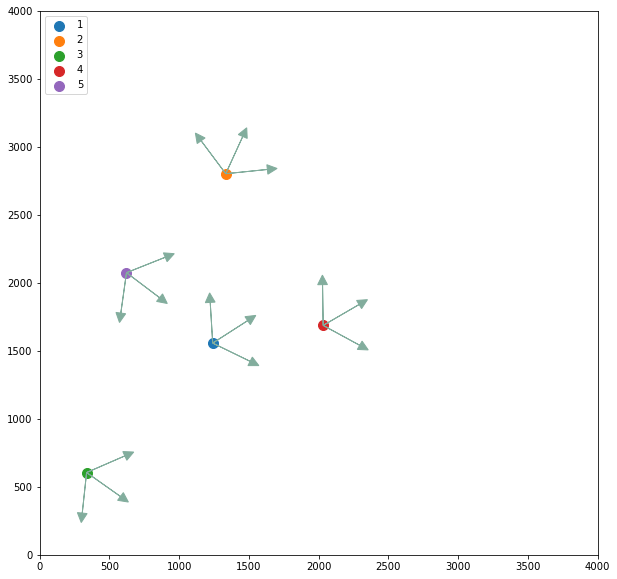

32700


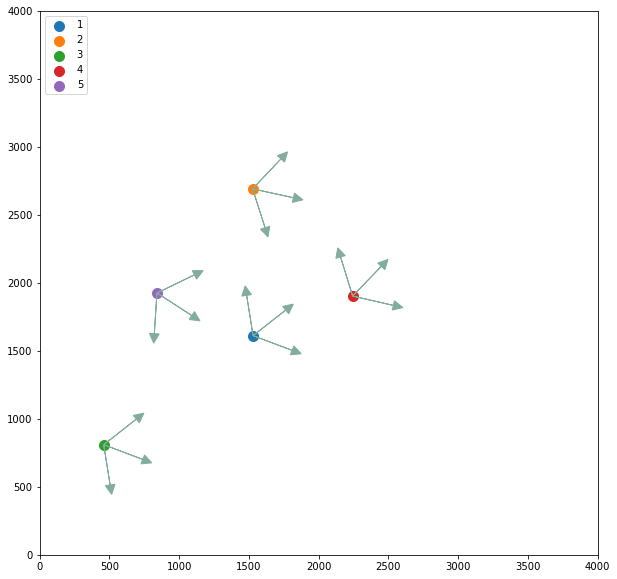

32750


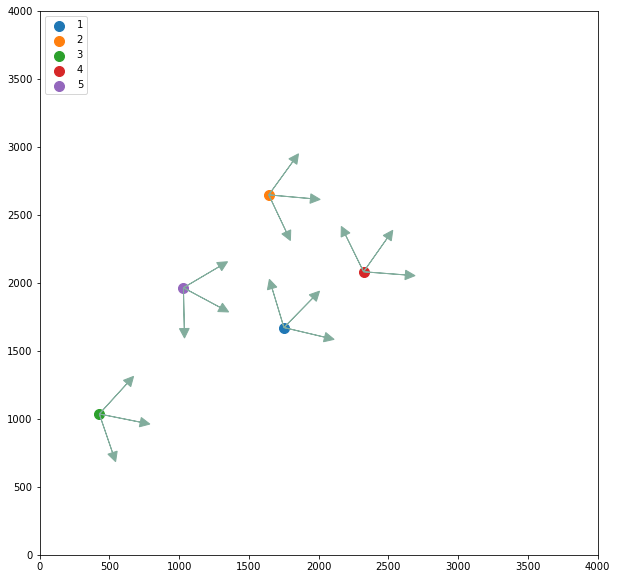

32800


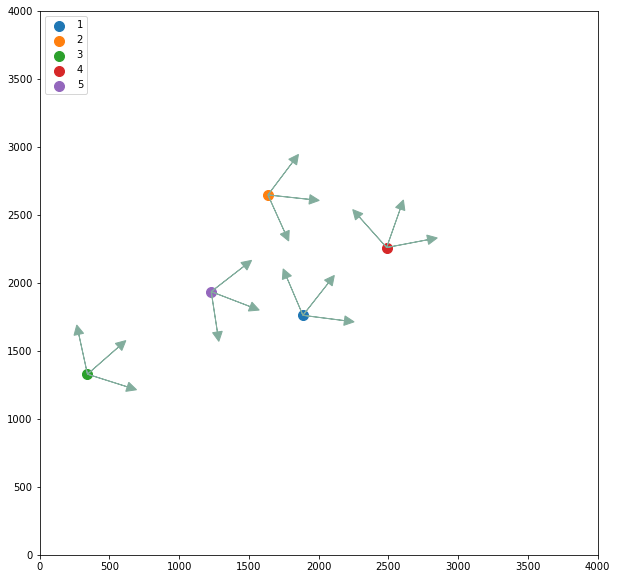

32850


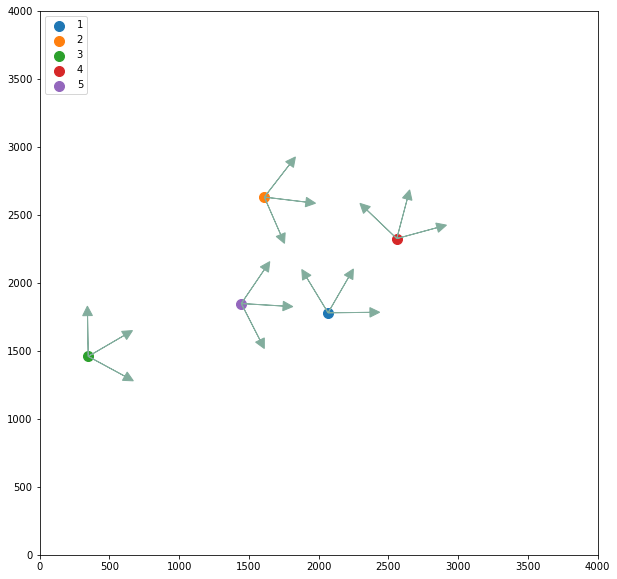

32900


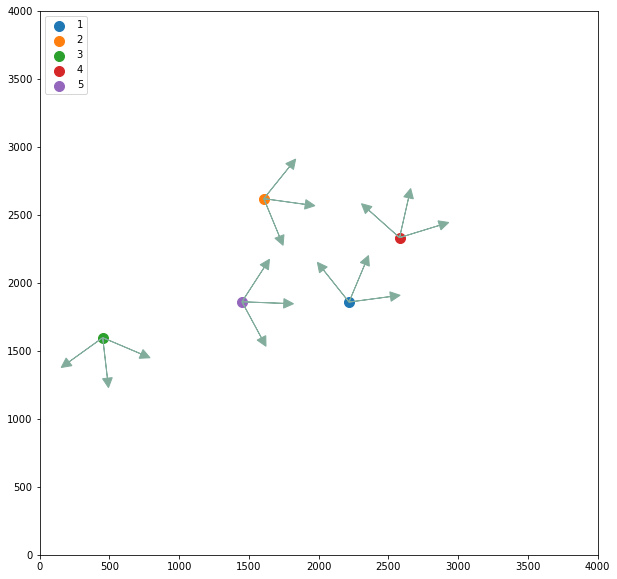

32950


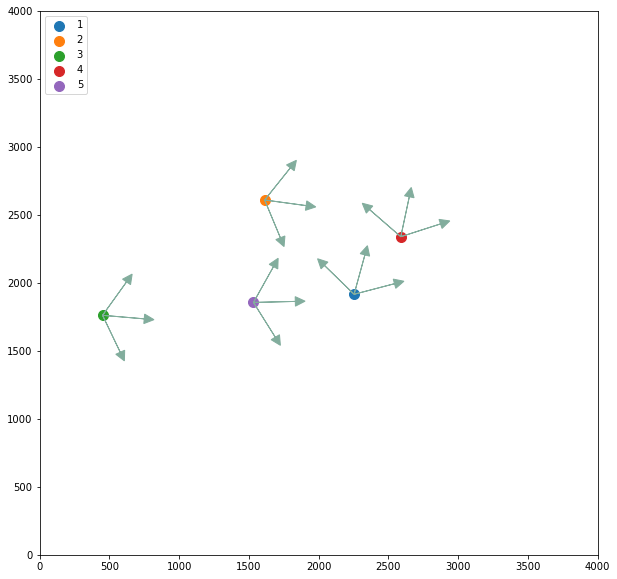

In [8]:
fov_angle = math.radians(60)

start =32000
end = 33000

length = 300

for index, row in  data_df.iloc[start:end:50].iterrows():
    fig, ax = plt.subplots(figsize=(10, 10))
     

    x = row["1TX"]
    y = row["1TY"]
    yaw = row["1RZ"]

    fig.clear()
    
    plt.xlim(0, 4000)
    plt.ylim(0, 4000)


    plt.scatter(x, y, s=100, label="1")
    plt.arrow(
        x,
        y,
        length * np.cos(yaw),
        length * np.sin(yaw),
        head_width=70,
        head_length=70,
        color="#82ad9d",
        lw=1,
    )
    plt.arrow(
        x,
        y,
        length * np.cos(yaw - fov_angle),
        length * np.sin(yaw - fov_angle),
        head_width=70,
        head_length=70,
        color="#82ad9d",
        lw=1,
    )
    plt.arrow(
        x,
        y,
        length * np.cos(yaw + fov_angle),
        length * np.sin(yaw + fov_angle),
        head_width=70,
        head_length=70,
        color="#82ad9d",
        lw=1,
    )

    x = row["2TX"]
    y = row["2TY"]
    yaw = row["2RZ"]
    plt.scatter(x, y, s=100, label="2")
    plt.arrow(
        x,
        y,
        length * np.cos(yaw),
        length * np.sin(yaw),
        head_width=70,
        head_length=70,
        color="#82ad9d",
        lw=1,
    )
    plt.arrow(
        x,
        y,
        length * np.cos(yaw - fov_angle),
        length * np.sin(yaw - fov_angle),
        head_width=70,
        head_length=70,
        color="#82ad9d",
        lw=1,
    )
    plt.arrow(
        x,
        y,
        length * np.cos(yaw + fov_angle),
        length * np.sin(yaw + fov_angle),
        head_width=70,
        head_length=70,
        color="#82ad9d",
        lw=1,
    )

    x = row["3TX"]
    y = row["3TY"]
    yaw = row["3RZ"]
    plt.scatter(x, y, s=100, label="3")
    plt.arrow(
        x,
        y,
        length * np.cos(yaw),
        length * np.sin(yaw),
        head_width=70,
        head_length=70,
        color="#82ad9d",
        lw=1,
    )
    plt.arrow(
        x,
        y,
        length * np.cos(yaw - fov_angle),
        length * np.sin(yaw - fov_angle),
        head_width=70,
        head_length=70,
        color="#82ad9d",
        lw=1,
    )
    plt.arrow(
        x,
        y,
        length * np.cos(yaw + fov_angle),
        length * np.sin(yaw + fov_angle),
        head_width=70,
        head_length=70,
        color="#82ad9d",
        lw=1,
    )

    x = row["4TX"]
    y = row["4TY"]
    yaw = row["4RZ"]
    plt.scatter(x, y, s=100, label="4")
    plt.arrow(
        x,
        y,
        length * np.cos(yaw),
        length * np.sin(yaw),
        head_width=70,
        head_length=70,
        color="#82ad9d",
        lw=1,
    )
    plt.arrow(
        x,
        y,
        length * np.cos(yaw - fov_angle),
        length * np.sin(yaw - fov_angle),
        head_width=70,
        head_length=70,
        color="#82ad9d",
        lw=1,
    )
    plt.arrow(
        x,
        y,
        length * np.cos(yaw + fov_angle),
        length * np.sin(yaw + fov_angle),
        head_width=70,
        head_length=70,
        color="#82ad9d",
        lw=1,
    )

    x = row["5TX"]
    y = row["5TY"]
    yaw = row["5RZ"]
    plt.scatter(x, y, s=100, label="5")
    plt.arrow(
        x,
        y,
        length * np.cos(yaw),
        length * np.sin(yaw),
        head_width=70,
        head_length=70,
        color="#82ad9d",
        lw=1,
    )
    plt.arrow(
        x,
        y,
        length * np.cos(yaw - fov_angle),
        length * np.sin(yaw - fov_angle),
        head_width=70,
        head_length=70,
        color="#82ad9d",
        lw=1,
    )
    plt.arrow(
        x,
        y,
        length * np.cos(yaw + fov_angle),
        length * np.sin(yaw + fov_angle),
        head_width=70,
        head_length=70,
        color="#82ad9d",
        lw=1,
    )

   
    plt.legend(loc="upper left")
    print(index)
    plt.show()
    

### Transformations

In [9]:
def get_transform_world_2_player(array, agls):
    Tpw = t.compose_matrix(translate=[array[0], array[1], array[2]], angles=agls) #returns 4x4
    Twp = np.linalg.inv(Tpw)
    return(Twp)

def transform_participants(px, py, pz, p_rx, p_ry, p_rz, nx, ny, nz):
    Twp = get_transform_world_2_player([px, py, pz], [p_rx, p_ry, p_rz])
    return Twp.dot(np.array([float(nx),float(ny),float(nz),1.0]))


count = 1

for i in range(1,6):
    print(i)
    x = '%sTX'%i
    y = '%sTY'%i
    z = '%sTZ'%i
    p = '%sRX'%i
    r = '%sRY'%i
    yaw = '%sRZ'%i
    
    for j in range(1,6):
        x1 = '%sTX'%j
        y1 = '%sTY'%j
        z1 = '%sTZ'%j
        p1 = '%sRX'%j
        r1 = '%sRY'%j
        yaw1 = '%sRZ'%j
        if i == j:
            continue
        print(x, x1)
        data_df["%s%sx"%(i,j)] = data_df.apply(lambda row: transform_participants(row[x], row[y], row[z],row[p], row[r], row[yaw], row[x1], row[y1], row[z1])[0], axis=1)
        data_df["%s%sy"%(i,j)] = data_df.apply(lambda row: transform_participants(row[x], row[y], row[z],row[p], row[r], row[yaw], row[x1], row[y1], row[z1])[1], axis=1)
        data_df["%s%sz"%(i,j)] = data_df.apply(lambda row: transform_participants(row[x], row[y], row[z],row[p], row[r], row[yaw], row[x1], row[y1], row[z1])[2], axis=1)
        print("%s%sz"%(i,j))



1
1TX 2TX
12z
1TX 3TX
13z
1TX 4TX
14z
1TX 5TX
15z
2
2TX 1TX
21z
2TX 3TX
23z
2TX 4TX
24z
2TX 5TX
25z
3
3TX 1TX
31z
3TX 2TX
32z
3TX 4TX
34z
3TX 5TX
35z
4
4TX 1TX
41z
4TX 2TX
42z
4TX 3TX
43z
4TX 5TX
45z
5
5TX 1TX
51z
5TX 2TX
52z
5TX 3TX
53z
5TX 4TX
54z


### Angle/FOV

In [11]:
#fov
fov_angle = math.radians(60)
tan = math.tan(fov_angle)

fov_df = pd.DataFrame()  
soc_eng = pd.DataFrame() 

soc_eng["Frame"] = data_df['Frame']

#in FOV or not?
def fov_dist(df, id):
    series = (1-abs(df['%sy'%id]/(tan*df['%sx'%id]))).clip(0)
    
    # if the other person is *behind*, set the 'fov_dist' to zero (not visible)
    series[data_df['%sx'%id] < 0] = 0
    return series

fov_df["Frame"] = data_df['Frame']

for i in range(1,6):
    for j in range(1,6):
        if i == j:
            continue
        fov_df["fov_p_%s_%s"% (i,j)] = fov_dist(data_df, "%s%s" %(i,j))

for i in range(1,6):
    for j in range(1,6):
        if i == j:
            continue
        fov_df["fov_%s_%s"% (i,j)] = (fov_df["fov_p_%s_%s"% (i,j)] * fov_df["fov_p_%s_%s"% (i,j)])
        soc_eng["social_engagement_%s_%s"% (i,j)] = (fov_df["fov_%s_%s"% (i,j)] / df_dist["distance_%s_%s" %(i, j)]).clip(0,1)
#         soc_eng['GROUP'] = data_df['GROUP']
        soc_eng['GROUP'] = "4"



In [12]:
soc_eng.describe()

,Frame,social_engagement_1_2,social_engagement_1_3,social_engagement_1_4,social_engagement_1_5,social_engagement_2_1,social_engagement_2_3,social_engagement_2_4,social_engagement_2_5,social_engagement_3_1,...,social_engagement_3_4,social_engagement_3_5,social_engagement_4_1,social_engagement_4_2,social_engagement_4_3,social_engagement_4_5,social_engagement_5_1,social_engagement_5_2,social_engagement_5_3,social_engagement_5_4
count,73049.000000,72555.000000,71573.000000,72592.000000,72702.000000,72554.000000,71582.000000,72595.000000,72709.000000,71574.000000,...,71621.000000,71740.000000,72592.000000,72595.000000,71620.000000,72748.000000,72702.000000,72708.000000,71739.000000,72748.000000
mean,36525.000000,0.413223,0.461324,0.372262,0.434487,0.289962,0.345281,0.382928,0.466777,0.407574,...,0.421579,0.250145,0.235112,0.534785,0.362989,0.267097,0.341095,0.200850,0.160140,0.404416
std,21087.574244,0.466585,0.473682,0.450840,0.462492,0.433284,0.463154,0.466328,0.478521,0.479133,...,0.469974,0.408973,0.395935,0.480595,0.452006,0.426059,0.459104,0.391509,0.344773,0.479998
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18263.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,36525.000000,0.042890,0.197084,0.000000,0.139518,0.000000,0.000000,0.000000,0.229753,0.000000,...,0.011911,0.000000,0.000000,0.859152,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,54787.000000,1.000000,1.000000,1.000000,1.000000,0.842963,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.493001,0.378328,1.000000,1.000000,0.680903,1.000000,0.000000,0.000000,1.000000
max,73049.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Social Engagement Metric 

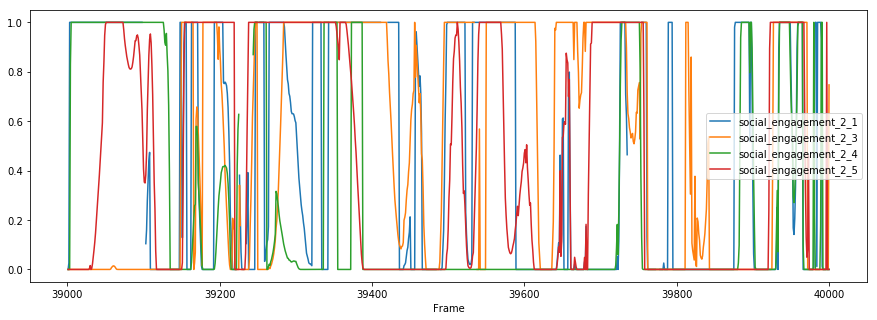

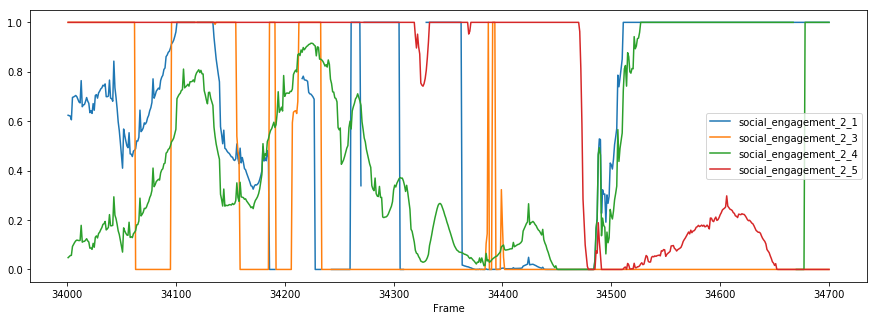

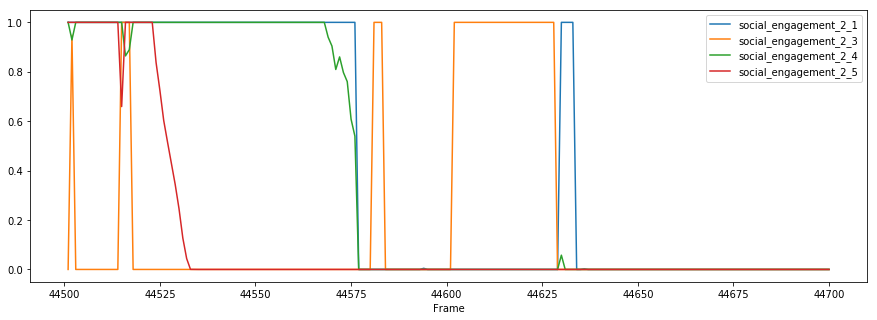

In [67]:
# grouped = soc_eng.groupby('GROUP')

# for name, group in grouped:
#     group.iloc[7000:60000][["Frame", "social_engagement_2_1", "social_engagement_2_3", "social_engagement_2_4", "social_engagement_2_5"]].plot(x="Frame", kind="line", figsize=(15,5))
#     group.iloc[33600:34700][["Frame", "social_engagement_2_1", "social_engagement_2_3", "social_engagement_2_4", "social_engagement_2_5"]].plot(x="Frame", kind="line", figsize=(15,5))


soc_eng.iloc[39000:40000][["Frame", "social_engagement_2_1", "social_engagement_2_3", "social_engagement_2_4", "social_engagement_2_5"]].plot(x="Frame", kind="line", figsize=(15,5))    
soc_eng.iloc[34000:34700][["Frame", "social_engagement_2_1", "social_engagement_2_3", "social_engagement_2_4", "social_engagement_2_5"]].plot(x="Frame", kind="line", figsize=(15,5))
soc_eng.iloc[44500:44700][["Frame", "social_engagement_2_1", "social_engagement_2_3", "social_engagement_2_4", "social_engagement_2_5"]].plot(x="Frame", kind="line", figsize=(15,5))


In [22]:
eng_df = pd.DataFrame()  

eng_df['soc_average_1'] = soc_eng[["social_engagement_1_2", "social_engagement_1_3", "social_engagement_1_4", "social_engagement_1_5"]].max(axis=1)
eng_df['soc_average_2'] = soc_eng[["social_engagement_2_1", "social_engagement_2_3", "social_engagement_2_4", "social_engagement_2_5"]].max(axis=1, numeric_only=True)
eng_df['soc_average_3'] = soc_eng[["social_engagement_3_1", "social_engagement_3_2", "social_engagement_3_4", "social_engagement_3_5"]].max(axis=1)
eng_df['soc_average_4'] = soc_eng[["social_engagement_4_1", "social_engagement_4_2", "social_engagement_4_3", "social_engagement_4_5"]].max(axis=1)
eng_df['soc_average_5'] = soc_eng[["social_engagement_5_1", "social_engagement_5_2", "social_engagement_5_3", "social_engagement_5_4"]].max(axis=1)
eng_df['GROUP'] = soc_eng["GROUP"]
eng_df = eng_df.reset_index()
# eng_df = eng_df.drop('index', axis=1)

eng_df = eng_df.fillna(0)
eng_df
# print(soc_eng.describe())
# print(eng_df.describe())

,index,soc_average_1,soc_average_2,soc_average_3,soc_average_4,soc_average_5,GROUP
0,0,0.0,1.0,0.0,0.0,1.0,4
1,1,0.0,1.0,0.0,0.0,1.0,4
2,2,0.0,1.0,0.0,0.0,1.0,4
3,3,0.0,1.0,0.0,0.0,0.0,4
4,4,0.0,1.0,0.0,0.0,0.0,4
...,...,...,...,...,...,...,...
73044,73044,0.0,1.0,1.0,1.0,0.0,4
73045,73045,0.0,1.0,1.0,1.0,0.0,4
73046,73046,0.0,1.0,1.0,1.0,0.0,4
73047,73047,0.0,1.0,1.0,1.0,0.0,4


In [23]:
###smoothing, rolling window average
# eng_df = eng_df.rolling(window=30).mean() 

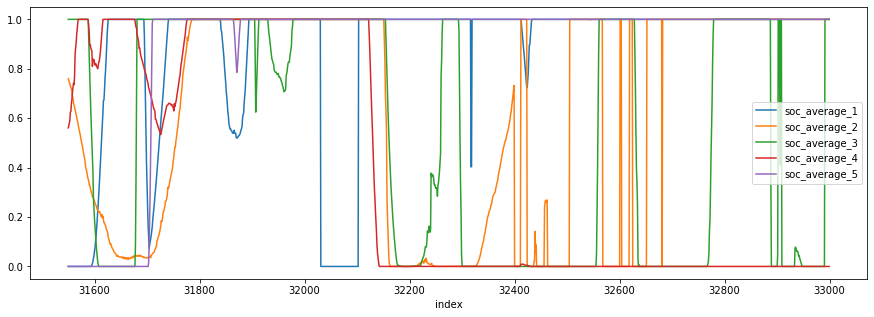

In [24]:
z # grouped = eng_df.groupby('GROUP')

# for name, group in grouped:
#     group.iloc[30000:30500][["index", "soc_average_1", "soc_average_2", "soc_average_3", "soc_average_4", "soc_average_5"]].plot(x="index", kind="line", figsize=(10,10))
    
    
# eng_df.iloc[40000:40200][["index", "soc_average_1", "soc_average_2", "soc_average_3", "soc_average_4", "soc_average_5"]].plot(x="index", kind="line", figsize=(15,5))    

eng_df.iloc[31550:33000][["index", "soc_average_1", "soc_average_2", "soc_average_3", "soc_average_4", "soc_average_5"]].plot(x="index", kind="line", figsize=(15,5))    

## Create Video

In [ ]:
#! python3

import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
import math
import numpy as np
import matplotlib.animation as animation

VICON_FPS = 100
VIDEO_FPS = 20

start = 600 * VIDEO_FPS
end =  800 * VIDEO_FPS  # 10sec video

#####################################################

csv_files = Path(".").glob("study5H.csv")
data_df = pd.concat([pd.read_csv(fp) for fp in csv_files])


# convert df index to time periods
data_df.set_index(
    pd.date_range(0, periods=len(data_df), freq="%fS" % (1 / VICON_FPS)), inplace=True
)

# resample df to target FPS
data_df = data_df.resample("%fS" % (1 / VIDEO_FPS)).mean()


data_df['1RZ'] = data_df['1RZ'] - 90
# data_df['2RZ'] = data_df['2RZ'] - 90
data_df['3RZ'] = data_df['3RZ'] + 90
data_df['4RZ'] = data_df['4RZ'] - 90
data_df['5RZ'] = data_df['5RZ'] - 90



fov_angle = math.radians(60)

length = 500

fig, ax = plt.subplots(figsize=(10, 10))


def init():
    plt.legend(loc="upper left")

    plt.xlim(-5000, 5000)
    plt.ylim(-5000, 5000)


def update(frame):

    print("Done %s%%" % (100 * (frame - start) / (end - start)))

    row = data_df.iloc[frame]

    x = row["1TX"]
    y = row["1TY"]
    yaw = row["1RZ"]

    fig.clear()

    plt.xlim(-5000, 5000)
    plt.ylim(-5000, 5000)

    plt.scatter(x, y, s=100, label="1")
    plt.arrow(
        x,
        y,
        length * np.cos(yaw),
        length * np.sin(yaw),
        head_width=100,
        head_length=100,
        color="#82ad9d",
        lw=1,
    )
    plt.arrow(
        x,
        y,
        length * np.cos(yaw - fov_angle),
        length * np.sin(yaw - fov_angle),
        head_width=100,
        head_length=100,
        color="#82ad9d",
        lw=1,
    )
    plt.arrow(
        x,
        y,
        length * np.cos(yaw + fov_angle),
        length * np.sin(yaw + fov_angle),
        head_width=100,
        head_length=100,
        color="#82ad9d",
        lw=1,
    )

    x = row["2TX"]
    y = row["2TY"]
    yaw = row["2RZ"]
    plt.scatter(x, y, s=100, label="2")
    plt.arrow(
        x,
        y,
        length * np.cos(yaw),
        length * np.sin(yaw),
        head_width=100,
        head_length=100,
        color="#82ad9d",
        lw=1,
    )
    plt.arrow(
        x,
        y,
        length * np.cos(yaw - fov_angle),
        length * np.sin(yaw - fov_angle),
        head_width=100,
        head_length=100,
        color="#82ad9d",
        lw=1,
    )
    plt.arrow(
        x,
        y,
        length * np.cos(yaw + fov_angle),
        length * np.sin(yaw + fov_angle),
        head_width=100,
        head_length=100,
        color="#82ad9d",
        lw=1,
    )

    x = row["3TX"]
    y = row["3TY"]
    yaw = row["3RZ"]
    plt.scatter(x, y, s=100, label="3")
    plt.arrow(
        x,
        y,
        length * np.cos(yaw),
        length * np.sin(yaw),
        head_width=100,
        head_length=100,
        color="#82ad9d",
        lw=1,
    )
    plt.arrow(
        x,
        y,
        length * np.cos(yaw - fov_angle),
        length * np.sin(yaw - fov_angle),
        head_width=100,
        head_length=100,
        color="#82ad9d",
        lw=1,
    )
    plt.arrow(
        x,
        y,
        length * np.cos(yaw + fov_angle),
        length * np.sin(yaw + fov_angle),
        head_width=100,
        head_length=100,
        color="#82ad9d",
        lw=1,
    )

    x = row["4TX"]
    y = row["4TY"]
    yaw = row["4RZ"]
    plt.scatter(x, y, s=100, label="4")
    plt.arrow(
        x,
        y,
        length * np.cos(yaw),
        length * np.sin(yaw),
        head_width=100,
        head_length=100,
        color="#82ad9d",
        lw=1,
    )
    plt.arrow(
        x,
        y,
        length * np.cos(yaw - fov_angle),
        length * np.sin(yaw - fov_angle),
        head_width=100,
        head_length=100,
        color="#82ad9d",
        lw=1,
    )
    plt.arrow(
        x,
        y,
        length * np.cos(yaw + fov_angle),
        length * np.sin(yaw + fov_angle),
        head_width=100,
        head_length=100,
        color="#82ad9d",
        lw=1,
    )

    x = row["5TX"]
    y = row["5TY"]
    yaw = row["5RZ"]
    plt.scatter(x, y, s=100, label="5")
    plt.arrow(
        x,
        y,
        length * np.cos(yaw),
        length * np.sin(yaw),
        head_width=100,
        head_length=100,
        color="#82ad9d",
        lw=1,
    )
    plt.arrow(
        x,
        y,
        600 * np.cos(yaw - fov_angle),
        600 * np.sin(yaw - fov_angle),
        head_width=100,
        head_length=100,
        color="#82ad9d",
        lw=1,
    )
    plt.arrow(
        x,
        y,
        600 * np.cos(yaw + fov_angle),
        600 * np.sin(yaw + fov_angle),
        head_width=100,
        head_length=100,
        color="#82ad9d",
        lw=1,
    )

    plt.legend(loc="upper left")
    plt.title(frame)
    
ani = animation.FuncAnimation(fig, update, frames=range(start, end), init_func=init)
writergif = animation.PillowWriter(fps=20)
ani.save('study5_4.gif',writer=writergif)


# ani.save("test.mp4", fps=VIDEO_FPS)


## Using human verified interaction starting points

In [25]:
def load_and_process_group_file(file_path, group_name):
    elan_df = pd.read_csv(file_path, sep='\t').fillna(0)
    data = [[column, x[0], x[1]] for column in elan_df.columns for x in elan_df[elan_df[column] != 0][column].str.split(", ")]
    for item in data:
        item.insert(0, group_name)
    return data

# List of group files and their respective group names
group_files = [
    ("group4D.txt", "4"),
    ("group4E.txt", "4"),
    ("group4P.txt", "4"),
    ("group4N.txt", "4")
]

# Load and process each group file
data_list = [load_and_process_group_file(file_path, group_name) for file_path, group_name in group_files]

# Merge all data from different groups
merged_data = list(merge(*data_list))

# Create the final DataFrame
columns = ['GROUP', 'Participant', 'Frame', 'Interacted']
group_df = pd.DataFrame(merged_data, columns=columns)
group_df = group_df.sort_values('Participant')
group_df = group_df.reset_index()
group_df = group_df.drop('index', axis=1)

group_df

,GROUP,Participant,Frame,Interacted
0,4,1,1581,5
1,4,1,9903,4 3 5
2,4,1,9903,2 3 4 5
3,4,1,9900,2 3 4
4,4,1,9755,4 5
...,...,...,...,...
124,4,5,1902,1
125,4,5,1515,2 4
126,4,5,6635,1 2 4
127,4,5,6959,1 4 3 2


In [26]:
VICON_FPS = 100
VIDEO_FPS = 20

for index, row in group_df.iterrows():
    frame = row['Frame']
    frame = (int(frame)/20)*100
    group_df.at[index,'Frame'] = int(frame)

group_df

,GROUP,Participant,Frame,Interacted
0,4,1,7905,5
1,4,1,49515,4 3 5
2,4,1,49515,2 3 4 5
3,4,1,49500,2 3 4
4,4,1,48775,4 5
...,...,...,...,...
124,4,5,9510,1
125,4,5,7575,2 4
126,4,5,33175,1 2 4
127,4,5,34795,1 4 3 2


In [27]:
for index, row in group_df.iterrows():
    range_frame = []
    frame = row['Frame']
    upp = (frame + 50)
    down = (frame - 50)
    for i in range(down, upp):
        range_frame.append(i)
    
# print(range_frame)
    val = group_df.isin({'Frame':(range_frame)})
print(val)



# for col in group_df:
# for frame in group_df['Frame']:
#     print(frame)


     GROUP  Participant  Frame  Interacted
0    False        False  False       False
1    False        False  False       False
2    False        False  False       False
3    False        False  False       False
4    False        False  False       False
..     ...          ...    ...         ...
124  False        False  False       False
125  False        False  False       False
126  False        False  False       False
127  False        False  False       False
128  False        False   True       False

[129 rows x 4 columns]


In [28]:
# #normalise

for i in range(1,6):
    for j in range(1,6):
        if i == j:
            continue
        df_dist["distance_%s_%s"% (i,j)] = MinMaxScaler().fit_transform(df_dist[["distance_%s_%s"% (i,j)]])

df_dist.iloc[7000:7100]

,distance_1_2,distance_1_3,distance_1_4,distance_1_5,distance_2_1,distance_2_3,distance_2_4,distance_2_5,distance_3_1,distance_3_2,...,distance_3_5,distance_4_1,distance_4_2,distance_4_3,distance_4_5,distance_5_1,distance_5_2,distance_5_3,distance_5_4,Frame
7000,0.306945,0.239580,0.323586,0.299126,0.306945,0.253126,0.156917,0.215529,0.239580,0.253126,...,0.308977,0.323586,0.156917,0.167645,0.298111,0.299126,0.215529,0.308977,0.298111,7000
7001,0.306838,0.239539,0.323584,0.299179,0.306838,0.253042,0.156902,0.215509,0.239539,0.253042,...,0.309020,0.323584,0.156902,0.167640,0.298201,0.299179,0.215509,0.309020,0.298201,7001
7002,0.306685,0.239509,0.323595,0.299223,0.306685,0.252917,0.156873,0.215293,0.239509,0.252917,...,0.308943,0.323595,0.156873,0.167632,0.298134,0.299223,0.215293,0.308943,0.298134,7002
7003,0.306574,0.239477,0.323602,0.299253,0.306574,0.252846,0.156889,0.215172,0.239477,0.252846,...,0.308917,0.323602,0.156889,0.167627,0.298138,0.299253,0.215172,0.308917,0.298138,7003
7004,0.306443,0.239436,0.323601,0.299315,0.306443,0.252780,0.156928,0.215125,0.239436,0.252780,...,0.308979,0.323601,0.156928,0.167621,0.298251,0.299315,0.215125,0.308979,0.298251,7004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7095,0.285244,0.240403,0.325442,0.299540,0.285244,0.267546,0.201722,0.172762,0.240403,0.267546,...,0.308077,0.325442,0.201722,0.167523,0.298236,0.299540,0.172762,0.308077,0.298236,7095
7096,0.284982,0.240310,0.325181,0.299476,0.284982,0.267685,0.201917,0.172458,0.240310,0.267685,...,0.308112,0.325181,0.201917,0.167499,0.298100,0.299476,0.172458,0.308112,0.298100,7096
7097,0.284883,0.240342,0.325188,0.299481,0.284883,0.267862,0.202261,0.172199,0.240342,0.267862,...,0.308144,0.325188,0.202261,0.167508,0.298103,0.299481,0.172199,0.308144,0.298103,7097
7098,0.284710,0.240375,0.325198,0.299483,0.284710,0.267949,0.202528,0.171912,0.240375,0.267949,...,0.308175,0.325198,0.202528,0.167516,0.298109,0.299483,0.171912,0.308175,0.298109,7098


In [29]:
eng_df.iloc[30:100]

,index,soc_average_1,soc_average_2,soc_average_3,soc_average_4,soc_average_5,GROUP
30,30,1.0,1.0,0.0,0.0,1.000000,4
31,31,1.0,1.0,0.0,0.0,1.000000,4
32,32,1.0,1.0,0.0,0.0,1.000000,4
33,33,1.0,1.0,0.0,0.0,1.000000,4
34,34,1.0,1.0,0.0,0.0,1.000000,4
...,...,...,...,...,...,...,...
95,95,1.0,0.0,0.0,0.0,0.739514,4
96,96,1.0,0.0,0.0,0.0,0.778255,4
97,97,1.0,0.0,0.0,0.0,0.743484,4
98,98,1.0,0.0,0.0,0.0,0.720003,4


In [63]:

def calculate_social_engagement(df_dist, eng_df, window_size, int_df):
    # Create a set of unique frames from group_df
    group_frames = set(group_df['Frame'])
    # Filter df_dist to only include rows with frames that are in group_frames
    df_filtered = df_dist[df_dist.index.isin(group_frames)]

    # Iterate through the filtered DataFrame
    for index, row in df_filtered.iterrows():
        last_index = -window_size
        count = 0   
        selector = index
        
        g_row = group_df.loc[group_df['Frame'] == index]
        g_par = g_row['Participant'].values[0]
        g_int = g_row['Interacted'].values[0]

       
        if selector and index >= (last_index + window_size):
            last_index = index
            count += 1
            
            for window_offset in range(-window_size, window_size):
                frame_idx = row["Frame"] + window_offset
                # name = i.replace('distance_', '')
                # participant = name.split("_")[0]
                frames = eng_df.loc[eng_df["index"] == int(frame_idx)]
                
                for index, roww in frames.iterrows():
                    eng = float(roww["soc_average_%s" % g_par])
                    # eng = float(eng_df[eng_df["index"] == frame_idx]["soc_average_%s" % g_par])
                    ro = pd.Series([g_par, window_offset, eng], index=['ID', 'Frame', 'social_engagement'])
                    int_df = pd.concat([int_df, ro.to_frame().T])
    return int_df

int_df = pd.DataFrame(columns=['ID', 'Frame', 'social_engagement'])

WINDOW_SIZE = 50     # Define the window size
int_df = calculate_social_engagement(df_dist, eng_df, WINDOW_SIZE, int_df)
int_df = int_df.reset_index()
int_df = int_df.drop('index', axis=1)
# int_df[790:950]
int_df

,ID,Frame,social_engagement
0,1,-50,1.0
1,1,-49,1.0
2,1,-48,1.0
3,1,-47,1.0
4,1,-46,1.0
...,...,...,...
12195,2,45,1.0
12196,2,46,1.0
12197,2,47,1.0
12198,2,48,1.0


In [31]:
# ##PROFILES WITHOUT HUMAN ANNOTATION

# def calculate_social_engagement(df_dist, eng_df, column_names, window_size, int_df):

#     for index, row in df_dist.loc[6000:60000].iterrows():
#         for i in column_names:
#             last_index = -window_size
#             count = 0
#             selector = df_dist[i][index] < 1.2

#             if selector and index >= (last_index + window_size):
#                 last_index = index
#                 count += 1
#                 for window_offset in range(-window_size, window_size):
#                     frame_idx = row["Frame"] + window_offset
#                     name = i.replace('distance_', '')
#                     participant = name.split("_")[0]
                    
#                     eng = float(eng_df[eng_df["index"] == frame_idx]["soc_average_%s" % participant])
#                     ro = pd.Series([participant, window_offset, eng], index=['ID', 'Frame', 'social_engagement'])
#                     int_df = pd.concat([int_df, ro.to_frame().T])

#         return int_df

# int_df = pd.DataFrame(columns=['ID', 'Frame', 'social_engagement'])

# column_names = ['distance_1_2', 'distance_1_3', 'distance_1_4', 'distance_1_5',
#                'distance_2_1', 'distance_2_3', 'distance_2_4', 'distance_2_5',
#                'distance_3_1', 'distance_3_2', 'distance_3_4', 'distance_3_5',
#                'distance_4_1', 'distance_4_2', 'distance_4_3', 'distance_4_5',
#                'distance_5_1', 'distance_5_2', 'distance_5_3', 'distance_5_4']

# # column_names = ["fov_p_1_2", "fov_p_1_3", "fov_p_1_4", "fov_p_1_5",
# #                "fov_p_2_1", "fov_p_2_3", "fov_p_2_4", "fov_p_2_5",
# #                "fov_p_3_1", "fov_p_3_2", "fov_p_3_4", "fov_p_3_5",
# #                "fov_p_4_1", "fov_p_4_2", "fov_p_4_3", "fov_p_4_5",
# #                "fov_p_5_1", "fov_p_5_2", "fov_p_5_3", "fov_p_5_4",]
# WINDOW_SIZE = 100     # Define the window size
# int_df = calculate_social_engagement(df_dist, eng_df, column_names, WINDOW_SIZE, int_df)
# int_df = int_df.reset_index()
# int_df = int_df.drop('index', axis=1)
# int_df
# int_df[0:950]

In [32]:
int_df

,ID,Frame,social_engagement
0,1,-50,1.0
1,1,-49,1.0
2,1,-48,1.0
3,1,-47,1.0
4,1,-46,1.0
...,...,...,...
12195,2,45,1.0
12196,2,46,1.0
12197,2,47,1.0
12198,2,48,1.0


In [33]:
int_df["ID"] = pd.to_numeric(int_df["ID"])
int_df["Frame"] = pd.to_numeric(int_df["Frame"])
int_df["social_engagement"] = pd.to_numeric(int_df["social_engagement"])

int_df

,ID,Frame,social_engagement
0,1,-50,1.0
1,1,-49,1.0
2,1,-48,1.0
3,1,-47,1.0
4,1,-46,1.0
...,...,...,...
12195,2,45,1.0
12196,2,46,1.0
12197,2,47,1.0
12198,2,48,1.0


In [34]:
interaction_profiles = int_df.groupby(['ID', 'Frame']).agg({'social_engagement':['mean','std']})
                                      
interaction_profiles.columns = ['_'.join(col) for col in interaction_profiles.columns.values]
interaction_profiles = interaction_profiles.reset_index()
interaction_profiles

,ID,Frame,social_engagement_mean,social_engagement_std
0,1,-50,0.557331,0.472657
1,1,-49,0.552120,0.475659
2,1,-48,0.552296,0.474782
3,1,-47,0.587315,0.469515
4,1,-46,0.587014,0.469730
...,...,...,...,...
495,5,45,0.666667,0.485071
496,5,46,0.666667,0.485071
497,5,47,0.666667,0.485071
498,5,48,0.667273,0.484195


In [35]:
int_df[int_df["Frame"] ==0].groupby('ID').count()

,Frame,social_engagement
ID,,
1,28,28
2,31,31
3,24,24
4,21,21
5,18,18


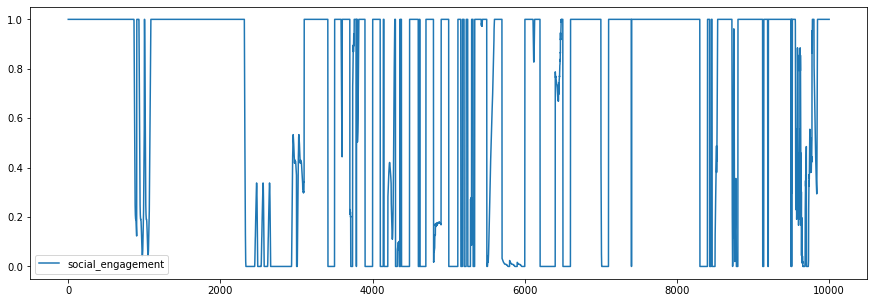

In [36]:
# fig, ax = plt.subplots(figsize=(20,12))
# sns.lineplot(data=int_df, y="social_engagement",x="Frame",hue="ID",ci=None, palette="flare")

# plt.plot(data=int_df, ax=ax, kind='line', x='Frame', y='social_engagement')

int_df.iloc[0:10000][["social_engagement"]].plot(kind="line", figsize=(15,5))


ID
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
4    AxesSubplot(0.125,0.125;0.775x0.755)
5    AxesSubplot(0.125,0.125;0.775x0.755)
Name: social_engagement, dtype: object

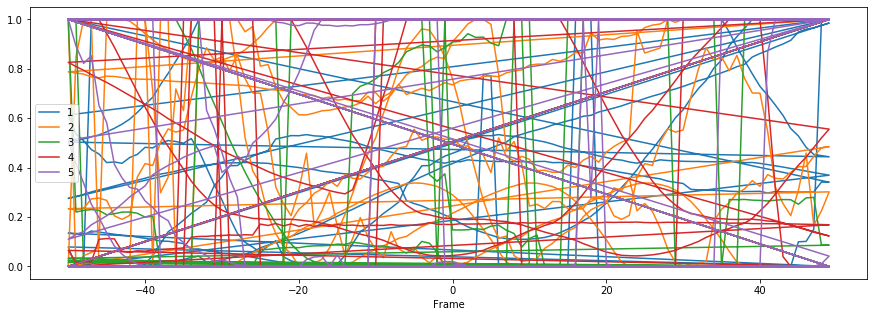

In [37]:
# fig, ax = plt.subplots(figsize=(20,12))
# sub_df = pd.DataFrame()
# rang = int_df
# grouped = int_df[int_df["ID"].isin(["1","2"])].groupby('ID')
# for key, group in grouped:
#     group.plot(ax=ax, kind='line', x='Frame', y='social_engagement', label=key)
# plt.show()
# fig, ax = plt.subplots(figsize=(20,12))

# plt.plot(data=int_df[int_df["ID"].isin(["3", "4"])], ax=ax, kind='line', x='Frame', y='social_engagement')

# fig, ax = plt.subplots(figsize=(20,5))
# plt.plot(int_df,x = 'social_engagement', y='Frame', hue="ID")
# plt.show()


fig, ax = plt.subplots(figsize=(15,5))
int_df.set_index('Frame', inplace=True)
int_df.groupby('ID')['social_engagement'].plot(legend=True)

## Correlations between social engagement profiles and personality

In [290]:
file = Path("big5.csv")
big5_df = pd.read_csv(file)

/tmp/ipykernel_6511/703439900.py:92: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(angles, stats, 'o-', linewidth=2, linestyle="solid", color=graph_color) # Draw the plot (or the frame on the radar chart)


ValueError: The number of FixedLocator locations (6), usually from a call to set_ticks, does not match the number of ticklabels (5).

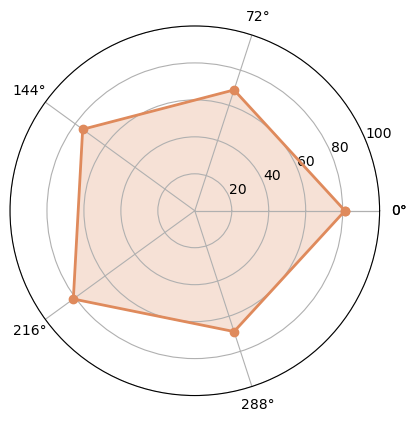

In [291]:
emotional_stability = 0
extraversion = 0
agreeableness = 0
conscientiousness = 0
intellect = 0

par = []
es = []
ex = []
ag = []
co = []
ig = []
age = []
sex = []
country = []
helmet = []
group = []

big5 = ["emotional_stability", "extraversion", "agreeableness", "conscientiousness", "intellect"]

dfbig5 = pd.DataFrame()  

for index, row in big5_df.iterrows():

    participant = row['p_id']
    r = lambda: random.randint(0,255)
    
    ec = row['n1'] + row['n2'] + row['n3'] + row['n4']
    e = row['e1'] + row['e2'] + row['e3'] + row['e4']
    a = row['a1'] + row['a2'] + row['a3'] + row['a4']
    c = row['c1'] + row['c2'] + row['c3'] + row['c4']
    i = row['i1'] + row['i2'] + row['i3'] + row['i4']
    
    p_age = row['age']
    p_sex = row['gender']
    p_country = row['culture']
    
    emotional_stability = (ec/16)*100
    extraversion = (e/16)*100
    agreeableness = (a/16)*100
    conscientiousness = (c/16)*100
    intellect = (i/16)*100

    values = [emotional_stability,extraversion,agreeableness,conscientiousness,intellect]
    
    par.append(participant)
    es.append(emotional_stability)
    ex.append(extraversion)
    ag.append(agreeableness)
    co.append(conscientiousness)
    ig.append(intellect)
    age.append(p_age)
    sex.append(p_sex)
    country.append(p_country)
    helmet.append(row['helmet'])
    group.append(row['group'])
    
# dfbig5["participant"] = par
dfbig5["emotional_stability"] = es
dfbig5["extraversion"] = ex
dfbig5["agreeableness"] = ag
dfbig5["conscientiousness"] = co
dfbig5["intellect"] = ig
dfbig5["helmet"] = helmet
dfbig5["group"] = group
dfbig5["age"] = age


emotional_stability = (ec/16)*100
extraversion = (e/16)*100
agreeableness = (a/16)*100
conscientiousness = (c/16)*100
intellect = (i/16)*100

values = [emotional_stability,extraversion,agreeableness,conscientiousness,intellect]

es.append(emotional_stability)
ex.append(extraversion)
ag.append(agreeableness)
co.append(conscientiousness)
ig.append(intellect)


angles=np.linspace(0, 2*np.pi, len(big5), endpoint=False)
stats=np.concatenate((values,[values[0]]))
angles=np.concatenate((angles,[angles[0]]))

fig=plt.figure()
graph_color = ('#%02X%02X%02X' % (r(),r(),r()))
ax = fig.add_subplot(111, polar=True)  # Set polar axis
plt.ylim(0,100) # axis 0-100
ax.plot(angles, stats, 'o-', linewidth=2, linestyle="solid", color=graph_color) # Draw the plot (or the frame on the radar chart)
ax.fill(angles, stats, alpha=0.25, color=graph_color)  #Fulfill the area
ax.set_thetagrids(angles * 180/np.pi, big5)  # Set the label for each axis
ax.grid(True)

print(es) 

In [292]:
group1 = dfbig5[dfbig5['group'] == 4]
  
# interaction_profiles = interaction_profiles[interaction_profiles["ID"].isin(group1.reset_index()["helmet"])]
soceng_mean = interaction_profiles.groupby("ID")["social_engagement_mean"].mean().reset_index()
# soceng_mean = soceng_mean.set_index("ID")

soceng_std = interaction_profiles.groupby("ID")["social_engagement_std"].mean().reset_index()
# soceng_std.index = np.arange(1, len(soceng_std) + 1)
# soceng_dfbig5std = soceng_std.set_index("ID")

group1

,emotional_stability,extraversion,agreeableness,conscientiousness,intellect,helmet,group,age
15,81.25,75.00,75.00,68.75,81.25,1,4,53
16,93.75,75.00,75.00,68.75,81.25,2,4,34
17,75.00,75.00,75.00,87.50,68.75,3,4,59
18,68.75,81.25,87.50,68.75,68.75,4,4,38
19,62.50,81.25,93.75,81.25,56.25,5,4,34


In [293]:
interaction_profiles_after = interaction_profiles[interaction_profiles["Frame"]>0]
interaction_profiles_before = interaction_profiles[interaction_profiles["Frame"]<0]

soceng_after_mean = interaction_profiles_after.groupby("ID")["social_engagement_mean"].mean().reset_index()
# soceng_after_mean = soceng_after_mean.set_index("ID")
soceng_after_mean = soceng_after_mean.rename(columns={"social_engagement_mean":"social_engagement_after"})

soceng_before_mean = interaction_profiles_before.groupby("ID")["social_engagement_mean"].mean().reset_index()
# soceng_before_mean = soceng_before_mean.set_index("ID")
soceng_before_mean = soceng_before_mean.rename(columns={"social_engagement_mean":"social_engagement_before"})

soceng_before_delta = soceng_after_mean.rename(columns={"social_engagement_after":"social_engagement_delta"})
soceng_before_delta["social_engagement_delta"] -= soceng_before_mean["social_engagement_before"]


interaction_profiles_after

,ID,Frame,social_engagement_mean,social_engagement_std
51,1,1,0.332139,0.329682
52,1,2,0.334013,0.329070
53,1,3,0.327651,0.322297
54,1,4,0.335141,0.317015
55,1,5,0.335222,0.317162
...,...,...,...,...
495,5,45,0.288683,0.237558
496,5,46,0.289036,0.237999
497,5,47,0.303315,0.257967
498,5,48,0.303958,0.258337


In [312]:
group1 = dfbig5[dfbig5['group'] == 1]
group1 = group1.sort_values(by=['helmet'], ascending=True)
group1.index = np.arange(1, len(group1) + 1)


big5 = ["emotional_stability", "extraversion", "agreeableness", "conscientiousness", "intellect"]
df_corr = pd.concat([soceng_mean, soceng_std, soceng_after_mean, soceng_before_mean, soceng_before_delta], axis=1)
df_corr.index = np.arange(1, len(df_corr) + 1)

print(group1)
full_corr = pd.merge(group1, df_corr, left_index=True, right_index=True)
full_corr


   emotional_stability  extraversion  agreeableness  conscientiousness  \
1                68.75         81.25          75.00              68.75   
2                75.00         81.25          87.50              68.75   
3                75.00         81.25          75.00              93.75   
4                75.00         68.75          75.00              43.75   
5                75.00         81.25          81.25              81.25   

   intellect  helmet  group  age  
1      75.00       1      1   34  
2      75.00       2      1   29  
3      81.25       3      1   28  
4      68.75       4      1   30  
5      75.00       5      1   28  


,emotional_stability,extraversion,agreeableness,conscientiousness,intellect,helmet,group,age,ID,social_engagement_mean,ID,social_engagement_std,ID,social_engagement_after,ID,social_engagement_before,ID,social_engagement_delta
1,68.75,81.25,75.00,68.75,75.00,1,1,34,1,0.321371,1,0.319770,1,0.329042,1,0.313649,1,0.015392
2,75.00,81.25,87.50,68.75,75.00,2,1,29,2,0.438163,2,0.275854,2,0.437863,2,0.438275,2,-0.000412
3,75.00,81.25,75.00,93.75,81.25,3,1,28,3,0.319021,3,0.281065,3,0.312254,3,0.326382,3,-0.014127
4,75.00,68.75,75.00,43.75,68.75,4,1,30,4,0.281942,4,0.244780,4,0.285064,4,0.278414,4,0.006650
5,75.00,81.25,81.25,81.25,75.00,5,1,28,5,0.284475,5,0.267629,5,0.269225,5,0.299485,5,-0.030260


(array([[0., 0., 1., 4., 0.],
        [0., 0., 1., 4., 0.],
        [0., 0., 0., 4., 1.],
        [1., 0., 2., 1., 1.],
        [0., 0., 1., 4., 0.]]),
 array([43.75, 53.75, 63.75, 73.75, 83.75, 93.75]),
 <a list of 5 BarContainer objects>)

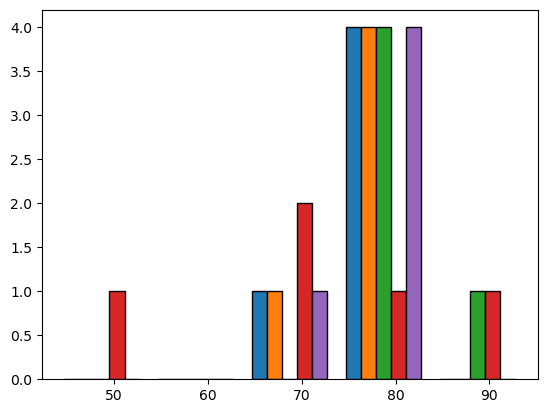

In [313]:
# sns.displot(data=full_corr[big5], kde=True)

plt.hist(full_corr[big5], ec='black', bins=5)

/tmp/ipykernel_62519/2807319666.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(full_corr[column])


ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

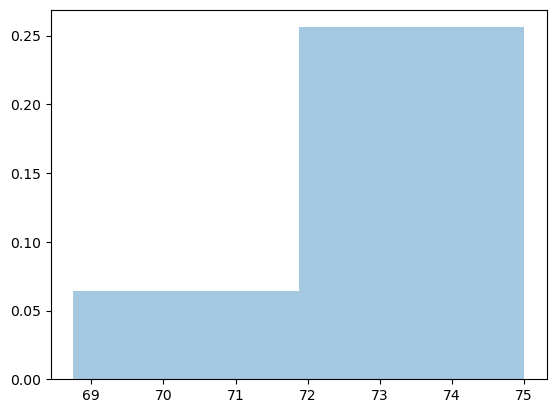

In [314]:
for column in full_corr[big5].columns:
    plt.figure()
    sns.distplot(full_corr[column])

In [315]:
for cat in big5+ ["age"]:
    print("soceng_mean <-> %s: (r, p): %s " %(cat, scipy.stats.pearsonr(full_corr[cat], full_corr["social_engagement_mean"])))
    print("soceng_std <-> %s: (r, p): %s " %(cat, scipy.stats.pearsonr(full_corr[cat], full_corr["social_engagement_std"])))
    print("soceng_after <-> %s: (r, p): %s " %(cat, scipy.stats.pearsonr(full_corr[cat], full_corr["social_engagement_after"])))
    print("soceng_before <-> %s: (r, p): %s " %(cat, scipy.stats.pearsonr(full_corr[cat], full_corr["social_engagement_before"])))
    print("soceng_delta <-> %s: (r, p): %s " %(cat, scipy.stats.pearsonr(full_corr[cat], full_corr["social_engagement_delta"])))
    print()

soceng_mean <-> emotional_stability: (r, p): (0.0668192830611535, 0.9149863977550439) 
soceng_std <-> emotional_stability: (r, p): (-0.8606661483665857, 0.06111210595748386) 
soceng_after <-> emotional_stability: (r, p): (-0.019818131838306063, 0.974768422698259) 
soceng_before <-> emotional_stability: (r, p): (0.15752867135495482, 0.8002609223942657) 
soceng_delta <-> emotional_stability: (r, p): (-0.6201079312364715, 0.2644716807176644) 

soceng_mean <-> extraversion: (r, p): (0.4124070996584489, 0.49019649239974566) 
soceng_std <-> extraversion: (r, p): (0.6778534247383458, 0.20855759968823595) 
soceng_after <-> extraversion: (r, p): (0.3507169808291235, 0.5627844566608655) 
soceng_before <-> extraversion: (r, p): (0.4730512712350998, 0.4209780634844708) 
soceng_delta <-> extraversion: (r, p): (-0.3482835279559436, 0.5656874294866859) 

soceng_mean <-> agreeableness: (r, p): (0.7617420507776577, 0.1345055564192742) 
soceng_std <-> agreeableness: (r, p): (-0.14486312776486196, 0.8162

In [210]:
# # plt.scatter(full_corr["age"], full_corr["social_engagement_after"])

# # scipy.stats.pearsonr(full_corr["age"], full_corr["social_engagement_after"])

# sns.lmplot(data=full_corr, x="social_engagement_std", y="emotional_stability")
# scipy.stats.pearsonr(full_corr["emotional_stability"], df_corr["social_engagement_std"])

# sns.lmplot(data=full_corr, x="social_engagement_before", y="agreeableness")
# scipy.stats.pearsonr(full_corr["agreeableness"], df_corr["social_engagement_before"])

# sns.lmplot(data=full_corr, x="social_engagement_std", y="age")
# scipy.stats.pearsonr(full_corr["age"], df_corr["social_engagement_std"])

### Detect if someone talking

In [18]:
import feat
from feat import Detector

# Define the function just to extract landmarks from images
detector = Detector(emotion_model='resmasknet', landmark_model="mobilefacenet", au_model='xgb', device='cpu')

detector

##try different model!!!!

feat.detector.Detector(face_model=retinaface, landmark_model=mobilefacenet, au_model=xgb, emotion_model=resmasknet, facepose_model=img2pose)

In [20]:
video_prediction = detector.detect_video("videos/H1s.mp4", skip_frames=24)
video_prediction.head()

100%|███████████████████████████████████████| 248/248 [1:16:11<00:00, 18.43s/it]


,FaceRectX,FaceRectY,FaceRectWidth,FaceRectHeight,FaceScore,x_0,x_1,x_2,x_3,x_4,...,anger,disgust,fear,happiness,sadness,surprise,neutral,input,frame,approx_time
frame,,,,,,,,,,,,,,,,,,,,,
0,532.563961,9.967422,780.827320,997.105448,0.992355,570.161365,570.395058,581.043308,603.839103,646.817455,...,0.000108,0.016044,0.000142,0.224129,0.131102,0.000431,0.628045,videos/H1s.mp4,0,00:00
24,531.064155,-4.842649,775.902687,999.974197,0.990961,563.114675,565.335809,579.351759,606.251386,652.944347,...,0.000072,0.003285,0.000030,0.470029,0.168435,0.000177,0.357972,videos/H1s.mp4,24,00:00
48,566.043095,-59.444923,804.724289,1072.035427,0.989011,569.165530,570.504059,584.957948,611.856668,654.867630,...,0.001277,0.007510,0.007431,0.139870,0.153835,0.019572,0.670504,videos/H1s.mp4,48,00:00
72,567.384453,-20.973644,818.857496,1061.639273,0.987186,531.454649,537.652810,557.953823,588.028309,632.719703,...,0.001197,0.003922,0.011565,0.352511,0.221603,0.313005,0.096198,videos/H1s.mp4,72,00:01
72,1435.308027,478.783121,55.583254,62.240325,0.880153,1442.385846,1440.565313,1440.196010,1439.958253,1439.866873,...,0.123673,0.323415,0.082240,0.279507,0.129806,0.024104,0.037254,videos/H1s.mp4,72,00:01


In [4]:
print(video_prediction.columns.tolist())

['FaceRectX', 'FaceRectY', 'FaceRectWidth', 'FaceRectHeight', 'FaceScore', 'x_0', 'x_1', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8', 'x_9', 'x_10', 'x_11', 'x_12', 'x_13', 'x_14', 'x_15', 'x_16', 'x_17', 'x_18', 'x_19', 'x_20', 'x_21', 'x_22', 'x_23', 'x_24', 'x_25', 'x_26', 'x_27', 'x_28', 'x_29', 'x_30', 'x_31', 'x_32', 'x_33', 'x_34', 'x_35', 'x_36', 'x_37', 'x_38', 'x_39', 'x_40', 'x_41', 'x_42', 'x_43', 'x_44', 'x_45', 'x_46', 'x_47', 'x_48', 'x_49', 'x_50', 'x_51', 'x_52', 'x_53', 'x_54', 'x_55', 'x_56', 'x_57', 'x_58', 'x_59', 'x_60', 'x_61', 'x_62', 'x_63', 'x_64', 'x_65', 'x_66', 'x_67', 'y_0', 'y_1', 'y_2', 'y_3', 'y_4', 'y_5', 'y_6', 'y_7', 'y_8', 'y_9', 'y_10', 'y_11', 'y_12', 'y_13', 'y_14', 'y_15', 'y_16', 'y_17', 'y_18', 'y_19', 'y_20', 'y_21', 'y_22', 'y_23', 'y_24', 'y_25', 'y_26', 'y_27', 'y_28', 'y_29', 'y_30', 'y_31', 'y_32', 'y_33', 'y_34', 'y_35', 'y_36', 'y_37', 'y_38', 'y_39', 'y_40', 'y_41', 'y_42', 'y_43', 'y_44', 'y_45', 'y_46', 'y_47', 'y_48', 'y_49', '

In [6]:
video_prediction['AU25'].mean()
# video_prediction['AU27'].max()
# video_prediction['AU22'].max()
# video_prediction['AU14'].max()
# video_prediction['AU26'].max()

0.24123338

In [10]:
mouth = video_prediction[["AU25", "AU26", "AU14"]]
mouth.iloc[150:180]

,AU25,AU26,AU14
frame,,,
3528,0.358712,0.341844,0.216655
3552,0.102041,0.096459,0.280882
3576,0.008942,0.105147,0.269985
3600,0.081196,0.202491,0.173768
3624,0.643201,0.119092,0.249561
3624,0.810326,0.097260,0.623785
3648,0.110290,0.127742,0.345433
3672,0.153207,0.177455,0.520680
3696,0.219818,0.155854,0.528218


In [14]:
talking = video_prediction.loc[(video_prediction['AU25'] >= 0.5)]
talking

,FaceRectX,FaceRectY,FaceRectWidth,FaceRectHeight,FaceScore,x_0,x_1,x_2,x_3,x_4,...,anger,disgust,fear,happiness,sadness,surprise,neutral,input,frame,approx_time
frame,,,,,,,,,,,,,,,,,,,,,
264,591.579087,-26.218017,789.476197,1098.641643,0.993102,515.216702,529.333204,557.775862,597.789668,655.236249,...,0.031109,0.367999,0.000057,0.135266,0.064460,0.000655,0.400454,H1s.mp4,264,00:04
1200,525.997361,-8.271468,746.943807,1016.173981,0.991313,534.166858,533.849926,546.408360,572.901413,620.165778,...,0.000046,0.003605,0.000018,0.409804,0.062236,0.000164,0.524127,H1s.mp4,1200,00:20
1248,1498.122615,687.432755,84.358451,107.830941,0.624091,1511.742292,1509.421750,1508.051610,1508.550142,1511.747005,...,0.203197,0.015897,0.067014,0.151678,0.147333,0.220850,0.194031,H1s.mp4,1248,00:20
1320,546.287795,14.122174,756.349073,1044.342746,0.978113,564.009824,559.176466,565.601136,589.165493,635.686488,...,0.001633,0.084090,0.097418,0.023050,0.215011,0.520795,0.058002,H1s.mp4,1320,00:22
1368,513.497846,-6.151719,799.598827,1065.187153,0.980322,535.524606,531.294184,540.687170,569.248573,621.560805,...,0.001277,0.090113,0.045880,0.002214,0.262585,0.438779,0.159152,H1s.mp4,1368,00:22
1704,432.882462,-17.776801,799.160566,1057.115303,0.979189,417.602811,426.607488,450.996897,485.289202,532.116828,...,0.004257,0.028767,0.023161,0.046258,0.374559,0.212014,0.310985,H1s.mp4,1704,00:28
1776,546.743611,-19.952512,787.712794,1046.410364,0.984833,510.021580,522.033021,547.886652,583.226638,634.752532,...,0.004123,0.041140,0.003948,0.753849,0.030477,0.056803,0.109658,H1s.mp4,1776,00:29
1800,527.946610,-20.495589,797.871765,1045.259944,0.990759,516.868949,524.077561,543.957368,574.012974,619.488784,...,0.003225,0.026472,0.000968,0.803050,0.040066,0.008930,0.117288,H1s.mp4,1800,00:30
1848,634.841961,5.431215,772.625686,968.795452,0.988635,624.733573,626.228497,641.799387,666.408663,701.810650,...,0.000248,0.013727,0.005572,0.432853,0.253508,0.226653,0.067438,H1s.mp4,1848,00:30


In [ ]:
#split video into frames
#ffmpeg -i videos/CROP/H1CROP.mp4 -vf fps=1 "videos/CROP/frames/group4/H1-frame%05d.png"

# Clustering

In [38]:
import sklearn
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Visualise Data Distribution

(array([3100.,  279.,  160.,  181.,  184.,   98.,   69.,  110.,   80.,
        7939.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

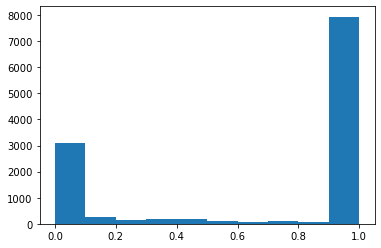

In [39]:
plt.hist(int_df['social_engagement'])

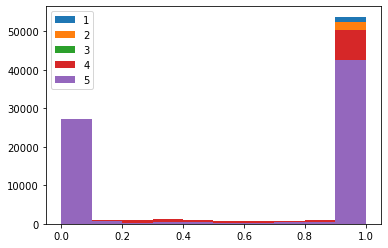

In [40]:
plt.hist(eng_df['soc_average_1'], label = '1')
plt.hist(eng_df['soc_average_2'], label = '2')
plt.hist(eng_df['soc_average_3'], label = '3')
plt.hist(eng_df['soc_average_4'], label = '4')
plt.hist(eng_df['soc_average_5'], label = '5')
plt.legend()

(array([14., 45., 56., 53., 69., 54., 73., 36., 48., 52.]),
 array([0.52394123, 0.55399936, 0.5840575 , 0.61411563, 0.64417377,
        0.6742319 , 0.70429004, 0.73434817, 0.76440631, 0.79446444,
        0.82452258]),
 <a list of 10 Patch objects>)

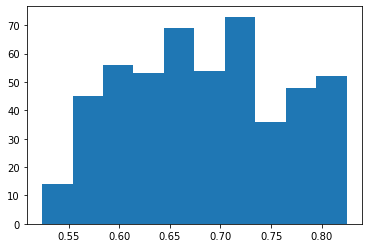

In [41]:
plt.hist(interaction_profiles['social_engagement_mean'])
# plt.hist(interaction_profiles['social_engagement_std'])

### 100 frame vector: 1 interaction point

In [42]:
# soc_vec = int_df.values.tolist()

In [43]:
chunk_size = 100

# Initialize an empty list to store chunks
soc_vec = []

data = int_df.drop('ID',axis=1)
data = data.drop('Frame',axis=1)

# Iterate over the DataFrame in chunks

for i in range(0, len(data), chunk_size):
    chunk = data.iloc[i:i + chunk_size]
    soc_vec.append(chunk.values.tolist())

# Create a nested list of all chunks
# nested_list = [item for sublist in chunks_list for item in sublist]

print(soc_vec)

KeyError: "['Frame'] not found in axis"

In [82]:
np.asarray(soc_vec).shape

(122, 100, 1)

In [83]:
soc_vec

[[[1.0],
  [1.0],
  [1.0],
  [1.0],
  [1.0],
  [1.0],
  [1.0],
  [1.0],
  [1.0],
  [1.0],
  [1.0],
  [1.0],
  [1.0],
  [1.0],
  [1.0],
  [1.0],
  [1.0],
  [1.0],
  [1.0],
  [1.0],
  [1.0],
  [1.0],
  [1.0],
  [1.0],
  [1.0],
  [1.0],
  [1.0],
  [1.0],
  [1.0],
  [1.0],
  [1.0],
  [1.0],
  [1.0],
  [1.0],
  [1.0],
  [1.0],
  [1.0],
  [1.0],
  [1.0],
  [1.0],
  [1.0],
  [1.0],
  [1.0],
  [1.0],
  [1.0],
  [1.0],
  [1.0],
  [1.0],
  [1.0],
  [1.0],
  [1.0],
  [1.0],
  [1.0],
  [1.0],
  [1.0],
  [1.0],
  [1.0],
  [1.0],
  [1.0],
  [1.0],
  [1.0],
  [1.0],
  [1.0],
  [1.0],
  [1.0],
  [1.0],
  [1.0],
  [1.0],
  [1.0],
  [1.0],
  [1.0],
  [1.0],
  [1.0],
  [1.0],
  [1.0],
  [1.0],
  [1.0],
  [1.0],
  [1.0],
  [1.0],
  [1.0],
  [1.0],
  [1.0],
  [1.0],
  [1.0],
  [1.0],
  [1.0],
  [1.0],
  [1.0],
  [1.0],
  [1.0],
  [1.0],
  [1.0],
  [1.0],
  [1.0],
  [1.0],
  [1.0],
  [1.0],
  [1.0],
  [1.0]],
 [[1.0],
  [1.0],
  [1.0],
  [1.0],
  [1.0],
  [1.0],
  [1.0],
  [1.0],
  [1.0],
  [1.0],
  [1.0],


In [84]:
# Convert the nested list to a NumPy array
data = np.array(soc_vec)
print(data[:,:,0])

data.shape

[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


(122, 100, 1)

#### Clustering interaction profiles

In [44]:
data = interaction_profiles['social_engagement_mean'].to_numpy()
print(data)

# print(data[:,1])

[0.55733129 0.55212043 0.55229642 0.58731488 0.5870144  0.58633427
 0.58708184 0.58761536 0.58936034 0.59088949 0.59363531 0.59617303
 0.6004379  0.60461416 0.60729908 0.61012167 0.61341644 0.61514797
 0.61254191 0.61263676 0.61174687 0.61113144 0.60903368 0.60857612
 0.60860918 0.60856959 0.61007732 0.61246801 0.61051476 0.61029377
 0.61009989 0.61019838 0.6101087  0.61022311 0.61045701 0.61090248
 0.61238361 0.61426525 0.61611276 0.6167375  0.61762101 0.61877137
 0.61955861 0.6203387  0.62059173 0.62169431 0.62319942 0.62314098
 0.62372732 0.6242097  0.62478514 0.62499851 0.62679529 0.62694214
 0.65497164 0.65468762 0.62738267 0.62748744 0.62811049 0.62822086
 0.62835495 0.62859335 0.62885349 0.62903615 0.62941693 0.62979303
 0.66594039 0.66651641 0.66683208 0.63203091 0.63292436 0.63379399
 0.63501126 0.63614497 0.6373961  0.63955377 0.64093475 0.64281612
 0.6443302  0.64598126 0.64728088 0.64846791 0.65024234 0.65166591
 0.65386222 0.65532358 0.65592752 0.65550005 0.65492903 0.6554

In [45]:
interaction_profiles

,ID,Frame,social_engagement_mean,social_engagement_std
0,1,-50,0.557331,0.472657
1,1,-49,0.552120,0.475659
2,1,-48,0.552296,0.474782
3,1,-47,0.587315,0.469515
4,1,-46,0.587014,0.469730
...,...,...,...,...
495,5,45,0.666667,0.485071
496,5,46,0.666667,0.485071
497,5,47,0.666667,0.485071
498,5,48,0.667273,0.484195


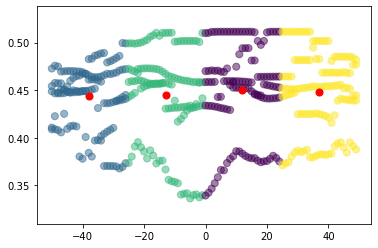

In [58]:
X = interaction_profiles[['Frame', 'social_engagement_std']].to_numpy()
X
kmeans = KMeans(n_clusters=4).fit(X)
centroids = kmeans.cluster_centers_
# print(centroids)

plt.scatter(interaction_profiles["Frame"],interaction_profiles['social_engagement_std'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

     ID  Frame  social_engagement_mean  social_engagement_std  Cluster
0     1    -50                0.557331               0.472657        0
1     1    -49                0.552120               0.475659        0
2     1    -48                0.552296               0.474782        0
3     1    -47                0.587315               0.469515        0
4     1    -46                0.587014               0.469730        0
..   ..    ...                     ...                    ...      ...
495   5     45                0.666667               0.485071        3
496   5     46                0.666667               0.485071        3
497   5     47                0.666667               0.485071        3
498   5     48                0.667273               0.484195        3
499   5     49                0.668985               0.481786        3

[500 rows x 5 columns]


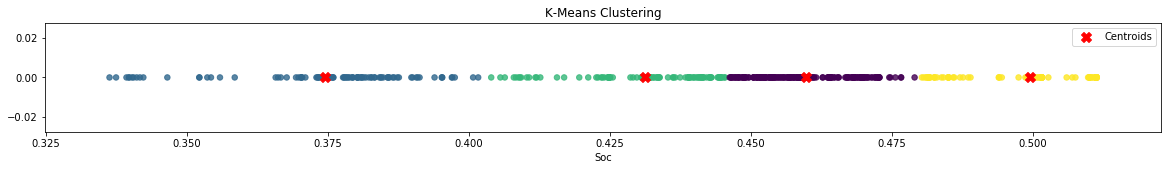

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans



# Extract the column you want to cluster
column_to_cluster = interaction_profiles['social_engagement_std'].values.reshape(-1, 1)

# Specify the number of clusters (k)
k = 4

# Perform k-means clustering
kmeans = KMeans(n_clusters=k)
kmeans.fit(column_to_cluster)

# Add cluster labels to the DataFrame
interaction_profiles['Cluster'] = kmeans.labels_

# Display the DataFrame with cluster labels
print(interaction_profiles)
plt.figure(figsize=(20,2))

# Plot the original data points
plt.scatter(interaction_profiles['social_engagement_std'], np.zeros_like(interaction_profiles['social_engagement_std']), c=interaction_profiles['Cluster'], cmap='viridis', s=30, alpha=0.8)
# Plot the cluster centers
plt.scatter(kmeans.cluster_centers_, np.zeros_like(kmeans.cluster_centers_), c='red', marker='X', s=100, label='Centroids')

plt.title('K-Means Clustering')
plt.xlabel('Soc')
plt.legend()
plt.show()


### ___________________________________________________________________

### ___________________________________________________________________

In [60]:
new = int_df.filter(['social_engagement'], axis=1)
# new = new.T
new

print(new.shape)
print(new)

(12200, 1)
       social_engagement
Frame                   
-50                  1.0
-49                  1.0
-48                  1.0
-47                  1.0
-46                  1.0
...                  ...
 45                  1.0
 46                  1.0
 47                  1.0
 48                  1.0
 49                  1.0

[12200 rows x 1 columns]


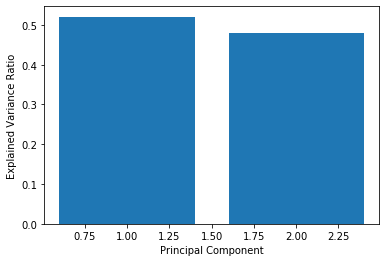

ValueError: n_components=3 must be between 0 and min(n_samples, n_features)=2 with svd_solver='full'

In [61]:

# Standardize the data (important for PCA)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(int_df)

# Perform PCA
pca = PCA()
pca_result = pca.fit_transform(scaled_data)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the explained variance
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

# Choose the number of components based on the explained variance
num_components = 3
pca = PCA(n_components=num_components)
pca_result = pca.fit_transform(scaled_data)

# Create a new DataFrame with the principal components
pc_columns = [f'PC{i}' for i in range(1, num_components + 1)]
df_pca = pd.DataFrame(data=pca_result, columns=pc_columns)

# Display the results
print("Original DataFrame:")
print(new)
print("\nDataFrame after PCA:")
print(df_pca)
plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D Representation of Data')
plt.show()

NameError: name 'df_pca' is not defined

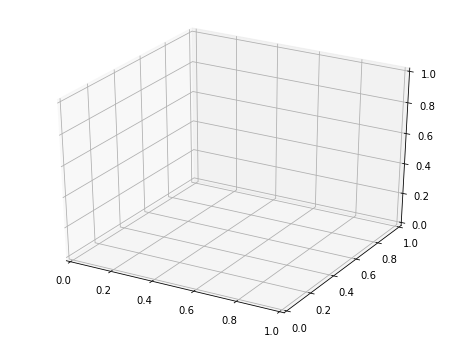

In [62]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_pca['PC2'], df_pca['PC3'], df_pca['PC1'], c='blue', marker='o')

# Set labels
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D PCA Plot')

plt.show()

In [55]:
#pca where the ID is the target

X = int_df.filter(['Frame','social_engagement'], axis=1)
y = int_df.filter(['ID'], axis=1)

x_scaled = StandardScaler().fit_transform(X)
pca = PCA(n_components=2)
pca_features = pca.fit_transform(x_scaled)
 
# Show PCA characteristics
print('Shape before PCA: ', x_scaled.shape)
print('Shape after PCA: ', pca_features.shape)

pca_df = pd.DataFrame(
    data=pca_features, 
    columns=[
        'Principal Component 1', 
        'Principal Component 2'
        ])

pca_df['target'] = y

import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()
# Plot 2D PCA Graph
sns.lmplot(
    x='Principal Component 1', 
    y='Principal Component 2', 
    data=pca_df, 
    hue='target', 
    fit_reg=False, 
    legend=True
    )
 
plt.show()

ValueError: n_components=2 must be between 0 and min(n_samples, n_features)=1 with svd_solver='full'

In [56]:
int_df

,ID,social_engagement
Frame,,
-50,1,1.0
-49,1,1.0
-48,1,1.0
-47,1,1.0
-46,1,1.0
...,...,...
45,2,1.0
46,2,1.0
47,2,1.0


In [68]:
new = int_df[['Frame', 'social_engagement']]
new
# new = int_df

,Frame,social_engagement
0,-50,1.0
1,-49,1.0
2,-48,1.0
3,-47,1.0
4,-46,1.0
...,...,...
12195,45,1.0
12196,46,1.0
12197,47,1.0
12198,48,1.0


In [69]:
new.set_index('Frame', inplace=True)
new = new.T
new

Frame,-50,-49,-48,-47,-46,-45,-44,-43,-42,-41,...,40,41,42,43,44,45,46,47,48,49
social_engagement,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [70]:
columns_per_row = 100
num_columns = len(new.columns) 
print(num_columns)

# Calculate the number of resulting rows
num_result_rows = num_columns // columns_per_row + (1 if num_columns % columns_per_row != 0 else 0)
print(num_result_rows)
# Initialize an empty DataFrame to store the result
result_df = pd.DataFrame()

# Loop through the range of rows
for i in range(num_result_rows):
    # Calculate the start and end indices for the current subset of columns
    start_index = i * columns_per_row
    end_index = min((i + 1) * columns_per_row, num_columns)
    
    # Extract the subset of columns and append them as a new row
    subset_df = new.iloc[:, start_index:end_index].copy()
    result_df = result_df.append(subset_df, ignore_index=True)

# Display the result
result_df


12200
122


Frame,-50,-49,-48,-47,-46,-45,-44,-43,-42,-41,...,40,41,42,43,44,45,46,47,48,49
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
118,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
119,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
120,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


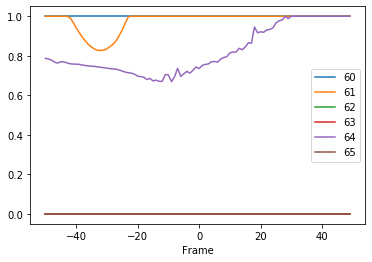

In [73]:
result_df.iloc[60:66].T.plot()

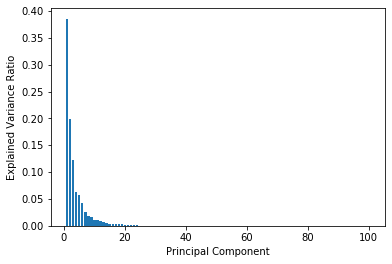

Original DataFrame:
Frame  -50  -49  -48  -47  -46  -45  -44  -43  -42  -41  ...   40   41   42  \
0      1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0  1.0  1.0   
1      1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0  1.0  1.0   
2      1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0  1.0  1.0   
3      1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0  1.0  1.0   
4      1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0  1.0  1.0   
..     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
117    1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0  1.0  1.0   
118    1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0  1.0  1.0   
119    1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0  1.0  1.0   
120    1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0  1.0  1.0   
121    1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0  1.0  1.0   

Frame   43   44   45   46   47 

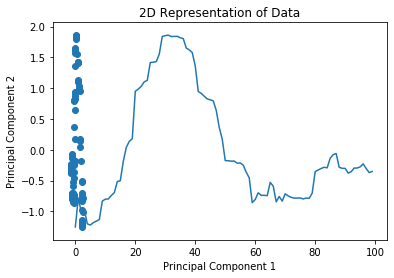

In [85]:
result_df = result_df.rename(str,axis="columns")

# Standardize the data (important for PCA)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(result_df)

# Perform PCA
pca = PCA()
#pca_result = pca.fit_transform(scaled_data)

pca_result = pca.fit_transform(result_df.T)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the explained variance
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

# Choose the number of components based on the explained variance
num_components = 5
pca = PCA(n_components=num_components)
pca_result = pca.fit_transform(result_df.T)

# Create a new DataFrame with the principal components
pc_columns = [f'PC{i}' for i in range(1, num_components + 1)]
df_pca = pd.DataFrame(data=pca_result, columns=pc_columns)



# Display the results
print("Original DataFrame:")
print(result_df)
print("\nDataFrame after PCA:")
print(df_pca)
plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D Representation of Data')
plt.show()


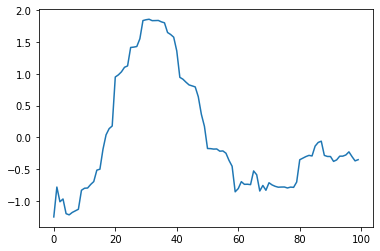

In [87]:
plt.plot(pca_result.T[1])

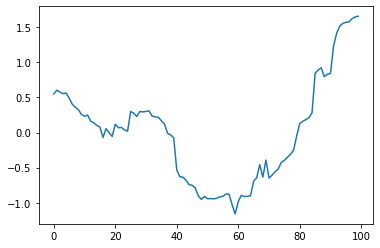

In [89]:
plt.plot(pca_result.T[2])

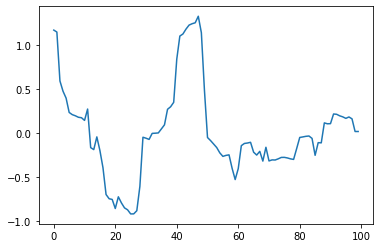

In [91]:
plt.plot(pca_result.T[3])

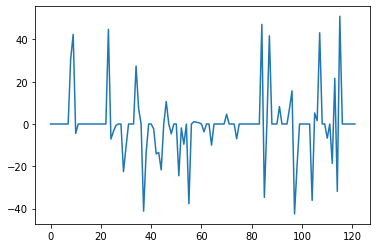

In [109]:
result_df.dot(pca_result)[0].plot()
projected_interactions = result_df.dot(pca_result)

In [126]:
projected_interactions_df = pd.DataFrame(projected_interactions)
projected_interactions_df

27.419287774590973

     ID  Frame  social_engagement_mean  social_engagement_std  Cluster
0     1    -50                0.557331               0.472657        0
1     1    -49                0.552120               0.475659        0
2     1    -48                0.552296               0.474782        0
3     1    -47                0.587315               0.469515        0
4     1    -46                0.587014               0.469730        0
..   ..    ...                     ...                    ...      ...
495   5     45                0.666667               0.485071        3
496   5     46                0.666667               0.485071        3
497   5     47                0.666667               0.485071        3
498   5     48                0.667273               0.484195        3
499   5     49                0.668985               0.481786        3

[500 rows x 5 columns]


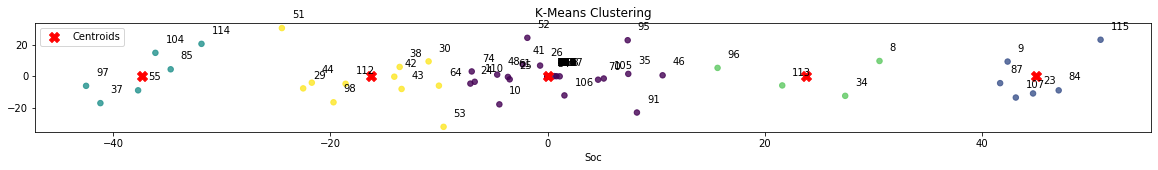

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans



# Extract the column you want to cluster
column_to_cluster = projected_interactions_df[0].values.reshape(-1, 1)

# Specify the number of clusters (k)
k = 5

# Perform k-means clustering
kmeans = KMeans(n_clusters=k)
kmeans.fit(column_to_cluster)

# Add cluster labels to the DataFrame
projected_interactions_df['Cluster'] = kmeans.labels_

# Display the DataFrame with cluster labels
print(interaction_profiles)
plt.figure(figsize=(20,2))

# Plot the original data points
plt.scatter(projected_interactions_df[0], projected_interactions_df[1], c=projected_interactions_df['Cluster'], cmap='viridis', s=30, alpha=0.8)
# Plot the cluster centers
plt.scatter(kmeans.cluster_centers_, np.zeros_like(kmeans.cluster_centers_), c='red', marker='X', s=100, label='Centroids')

for i, txt in enumerate(range(len(projected_interactions_df))):
    plt.annotate(txt, (projected_interactions_df.iloc[i,0], projected_interactions_df.iloc[i,1]), xytext=(10,10), textcoords='offset points')
    
plt.title('K-Means Clustering')
plt.xlabel('Soc')
plt.legend()
plt.show()

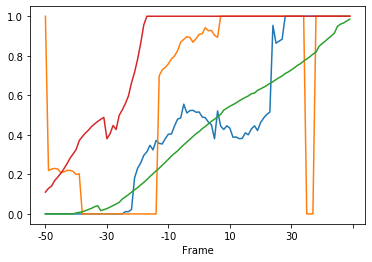

In [132]:
result_df.iloc[97].plot()
result_df.iloc[37].plot()
result_df.iloc[55].plot()
result_df.iloc[85].plot()

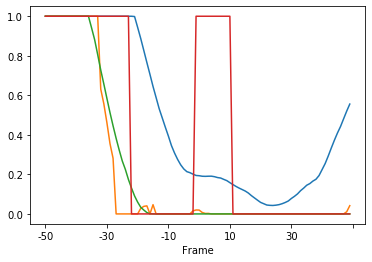

In [133]:
result_df.iloc[9].plot()
result_df.iloc[107].plot()
result_df.iloc[23].plot()
result_df.iloc[84].plot()

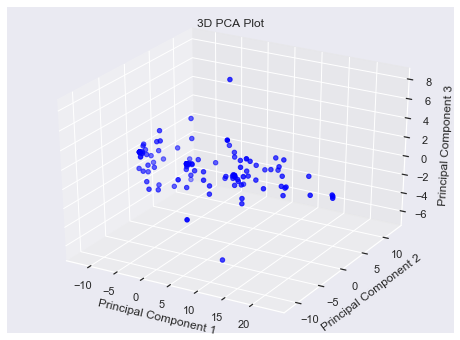

In [220]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'], c='blue', marker='o')

# Set labels
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D PCA Plot')

plt.show()

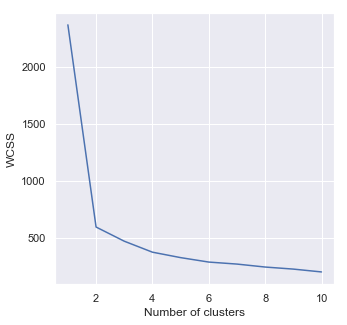

In [250]:
wcss = []
for i in range(1,11):
   model = KMeans(n_clusters = i, init = "k-means++")
   model.fit(result_df)
   wcss.append(model.inertia_)
plt.figure(figsize=(5,5))
plt.plot(range(1,11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [253]:
kmeans = KMeans(n_clusters=3)  # Adjust the number of clusters as needed
result_df['Cluster'] = kmeans.fit_predict(df_pca)

# Plot the k-means clusters
plt.scatter(df_pca[''], df_pca[:, 1], c=result_df['Cluster'], cmap='viridis')
plt.title('K-Means Clustering after PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

TypeError: '(slice(None, None, None), 0)' is an invalid key